# <center>**Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu mushroom**<center>

---

# **I.Giới thiệu**
- **Tập dữ liệu:** Từ kaggle
- **Mục tiêu:** Dùng Naive ngây thơ áp dụng vào tập dữ liệu là nấm
- **Giới thiệu về bộ dữ liệu**: File bao gồm 8124 quan sát và 23 cột (22 đặc trưng + 1 biến mục tiêu) để phân loại nấm độc hay ăn được. Biến mục tiêu và đặc trưng là:
> mục tiêu = e (ăn được) và p (độc)

> đặc trưng :

    cap-shape – Hình dạng mũ nấm

    cap-surface – Bề mặt mũ

    cap-color – Màu mũ

    bruises – Có bị bầm/dập không

    odor – Mùi

    gill-attachment – Gắn kết của phiến nấm

    gill-spacing – Khoảng cách phiến

    gill-size – Kích thước phiến

    gill-color – Màu phiến

    stalk-shape – Hình dạng cuống

    stalk-root – Rễ cuống

    stalk-surface-above-ring – Bề mặt cuống trên vòng

    stalk-surface-below-ring – Bề mặt cuống dưới vòng

    stalk-color-above-ring – Màu cuống phía trên vòng

    stalk-color-below-ring – Màu cuống phía dưới vòng

    veil-type – Loại màn phủ

    veil-color – Màu màn phủ

    ring-number – Số vòng

    ring-type – Loại vòng

    spore-print-color – Màu bào tử

    population – Mật độ phân bố

    habitat – Môi trường sống

# **II.Nhập và xem dữ liệu**

## **II.a.Nhập dữ liệu**

In [40]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
df = pd.read_csv("mushroom_classification.csv")

In [42]:
print(f"shape: {df.shape}")
df.head()

shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## **II.b.Xem dữ liệu**

In [43]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **III.Làm sạch, Chuẩn bị dữ liệu và thiết kế đặc trưng**

## **III.a.Làm sạch, Chuẩn bị dữ liệu**

In [45]:
df.isnull().sum().to_frame('Null value').T

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Null value,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.isna().sum().to_frame('NaN value').T

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
NaN value,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

class: 2
cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7


In [48]:

df.describe(include='all').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [49]:
df.describe(include=[object]).T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


## **III.b.Thiết kế đặc trưng**

Nhận xét:
 - Target gồm có độc và ăn được
 - Số lượng có độc và ăn được là gần như nhau.
 - Các đặc trưng không khác nhau nên sẽ không cần tổng quát hoá (Standardization).

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [51]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## **III.c.Nhận xét cuối sau chương 3**


Nhận xét:
 - Dữ liệu không có giá trị lạ và sạch từ đầu
 - Hiện tại không cần phải thiết kế đặc trưng mới
 - Dữ liệu đẹp
 
 **Kết luận: Đã có thể bắt đầu dùng phương pháp EDA và áp dụng mô hình**

# **IV.EDA-Trực quan hoá**

## **IV.a.Phân tích biến mục tiêu (Phân loại Nấm: Độc hay Ăn được)**

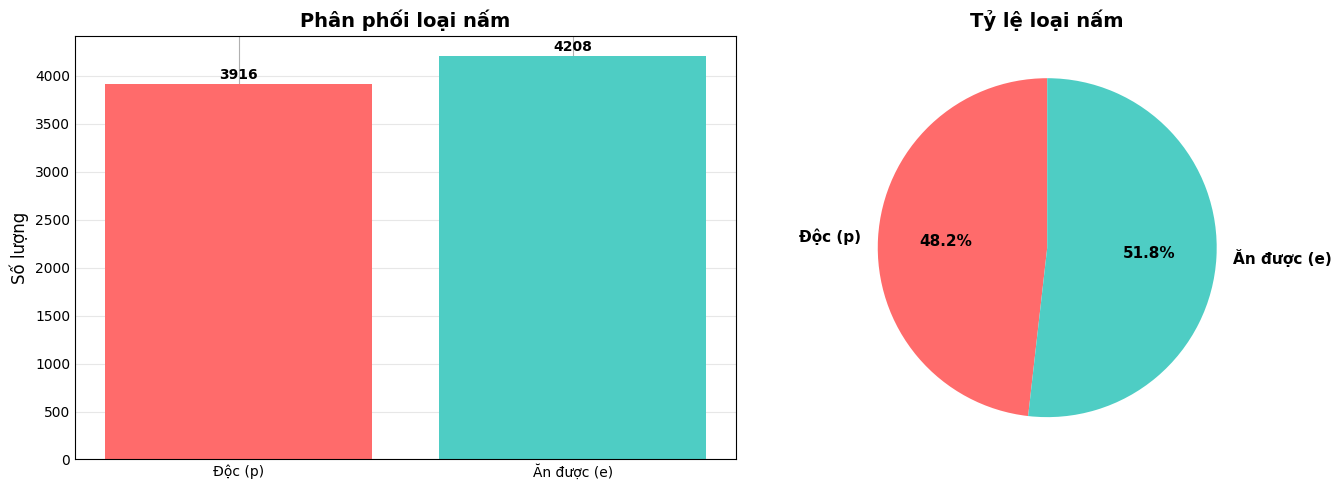

Tổng số nấm độc: 3916
Tổng số nấm ăn được: 4208
Tỷ lệ nấm độc: 48.20%
Tỷ lệ nấm ăn được: 51.80%


In [52]:
# Phân tích phân phối biến mục tiêu (class: p=độc, e=ăn được)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ cột (Bar chart)
class_counts = df['class'].value_counts()
axes[0].bar(['Độc (p)', 'Ăn được (e)'], [class_counts['p'], class_counts['e']], 
            color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Phân phối loại nấm', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate([class_counts['p'], class_counts['e']]):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Biểu đồ tròn (Pie chart)
colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie([class_counts['p'], class_counts['e']], labels=['Độc (p)', 'Ăn được (e)'], 
            autopct='%1.1f%%', colors=colors, startangle=90, 
            textprops={'fontsize': 11, 'weight': 'bold'})
axes[1].set_title('Tỷ lệ loại nấm', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Tổng số nấm độc: {class_counts['p']}")
print(f"Tổng số nấm ăn được: {class_counts['e']}")
print(f"Tỷ lệ nấm độc: {class_counts['p']/len(df)*100:.2f}%")
print(f"Tỷ lệ nấm ăn được: {class_counts['e']/len(df)*100:.2f}%")

## **IV.b.Phân tích mối quan hệ giữa các đặc trưng và lớp nấm**

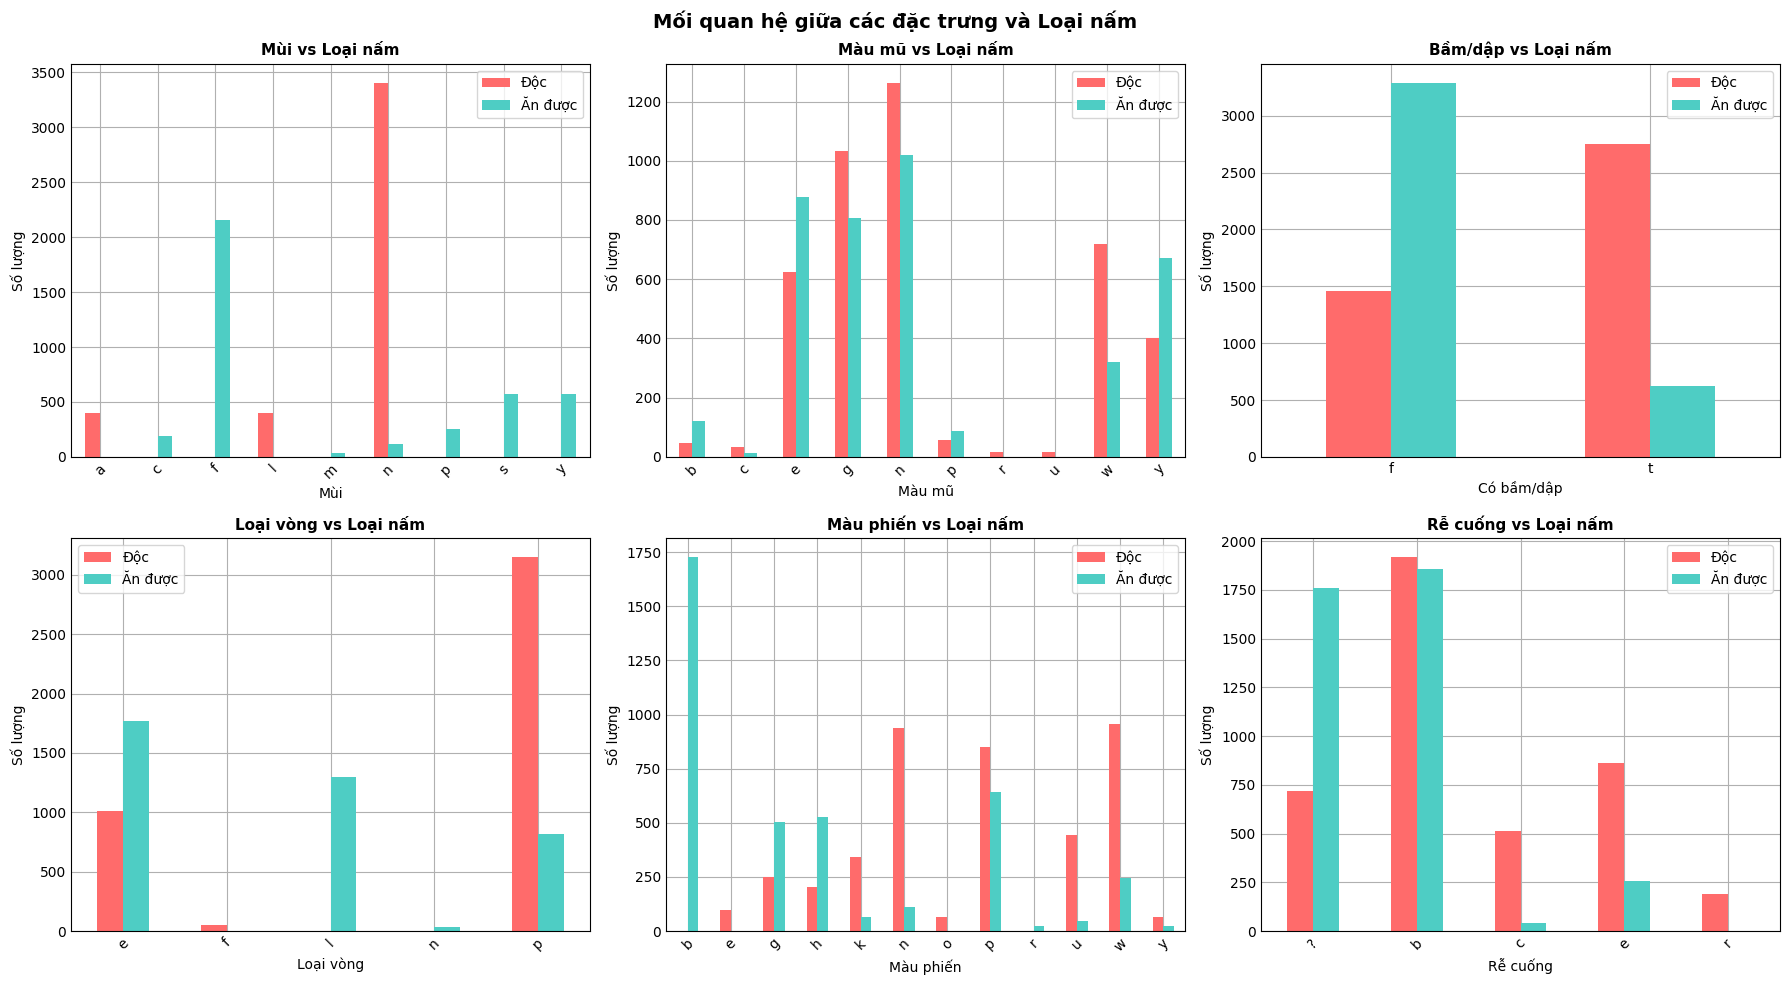


Tính tỷ lệ độc theo từng đặc trưng:

Mùi (odor):
class           e           p
odor                         
a      100.000000    0.000000
c        0.000000  100.000000
f        0.000000  100.000000
l      100.000000    0.000000
m        0.000000  100.000000
n       96.598639    3.401361
p        0.000000  100.000000
s        0.000000  100.000000
y        0.000000  100.000000

Màu mũ (cap-color):
class               e          p
cap-color                       
b           28.571429  71.428571
c           72.727273  27.272727
e           41.600000  58.400000
g           56.086957  43.913043
n           55.341506  44.658494
p           38.888889  61.111111
r          100.000000   0.000000
u          100.000000   0.000000
w           69.230769  30.769231
y           37.313433  62.686567


In [53]:
# Phân tích mối quan hệ giữa các đặc trưng phân loại và lớp nấm
# Chọn một số đặc trưng quan trọng để phân tích chi tiết

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Mối quan hệ giữa các đặc trưng và Loại nấm', fontsize=14, fontweight='bold')

# 1. Mùi (odor) vs class
odor_class = pd.crosstab(df['odor'], df['class'])
odor_class.plot(kind='bar', ax=axes[0, 0], color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Mùi vs Loại nấm', fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Mùi')
axes[0, 0].set_ylabel('Số lượng')
axes[0, 0].legend(['Độc', 'Ăn được'])
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Màu mũ (cap-color) vs class
cap_color_class = pd.crosstab(df['cap-color'], df['class'])
cap_color_class.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Màu mũ vs Loại nấm', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Màu mũ')
axes[0, 1].set_ylabel('Số lượng')
axes[0, 1].legend(['Độc', 'Ăn được'])
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Có bầm/dập (bruises) vs class
bruises_class = pd.crosstab(df['bruises'], df['class'])
bruises_class.plot(kind='bar', ax=axes[0, 2], color=['#FF6B6B', '#4ECDC4'])
axes[0, 2].set_title('Bầm/dập vs Loại nấm', fontsize=11, fontweight='bold')
axes[0, 2].set_xlabel('Có bầm/dập')
axes[0, 2].set_ylabel('Số lượng')
axes[0, 2].legend(['Độc', 'Ăn được'])
axes[0, 2].tick_params(axis='x', rotation=0)

# 4. Loại vòng (ring-type) vs class
ring_type_class = pd.crosstab(df['ring-type'], df['class'])
ring_type_class.plot(kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Loại vòng vs Loại nấm', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Loại vòng')
axes[1, 0].set_ylabel('Số lượng')
axes[1, 0].legend(['Độc', 'Ăn được'])
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Màu phiến (gill-color) vs class
gill_color_class = pd.crosstab(df['gill-color'], df['class'])
gill_color_class.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_title('Màu phiến vs Loại nấm', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Màu phiến')
axes[1, 1].set_ylabel('Số lượng')
axes[1, 1].legend(['Độc', 'Ăn được'])
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Rễ cuống (stalk-root) vs class
stalk_root_class = pd.crosstab(df['stalk-root'], df['class'])
stalk_root_class.plot(kind='bar', ax=axes[1, 2], color=['#FF6B6B', '#4ECDC4'])
axes[1, 2].set_title('Rễ cuống vs Loại nấm', fontsize=11, fontweight='bold')
axes[1, 2].set_xlabel('Rễ cuống')
axes[1, 2].set_ylabel('Số lượng')
axes[1, 2].legend(['Độc', 'Ăn được'])
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Tính tỷ lệ độc theo từng đặc trưng:")
print("="*50)
print("\nMùi (odor):")
print(pd.crosstab(df['odor'], df['class'], normalize='index') * 100)
print("\nMàu mũ (cap-color):")
print(pd.crosstab(df['cap-color'], df['class'], normalize='index') * 100)

## **IV.c.Phân tích tương quan giữa các đặc trưng**

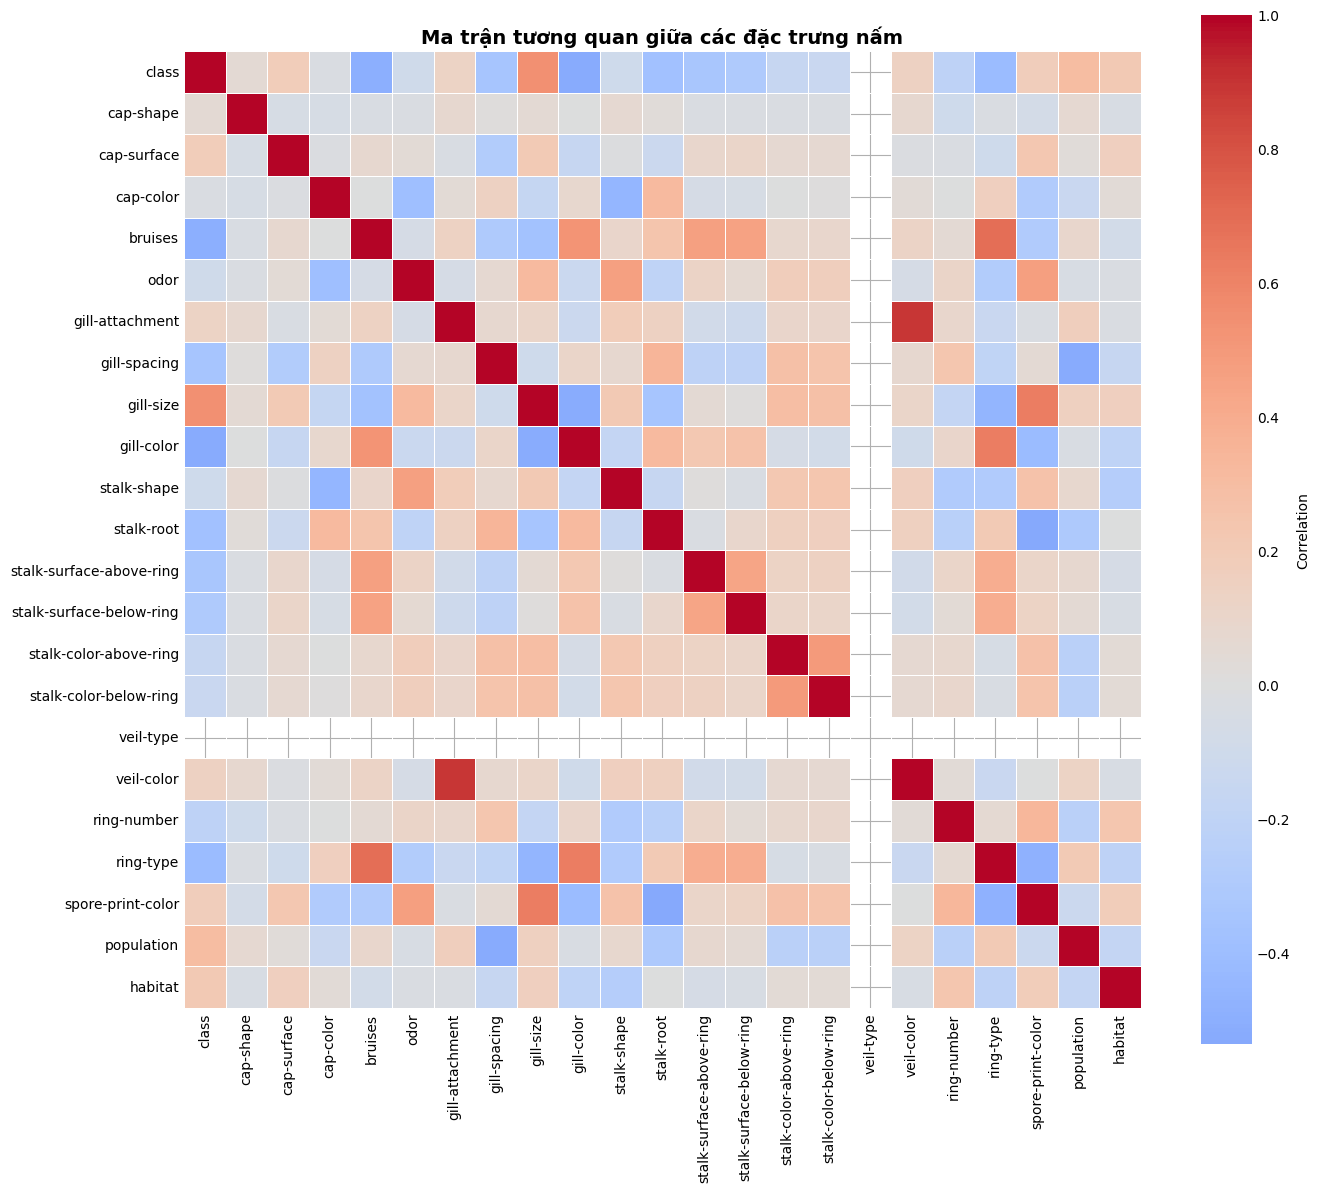


Tương quan của các đặc trưng với biến mục tiêu (class):
class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

Đặc trưng có tương quan mạnh nhất với loại nấm:
1. gill-size   

In [54]:
# Vì dữ liệu là phân loại (categorical), chuyển đổi thành số để tính tương quan
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_dict = {}

# Encode tất cả các cột
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# Tính ma trận tương quan
correlation_matrix = df_encoded.corr()

# Vẽ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'},
            square=True)
plt.title('Ma trận tương quan giữa các đặc trưng nấm', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Lấy tương quan của các đặc trưng với biến mục tiêu 'class'
class_correlation = correlation_matrix['class'].sort_values(ascending=False)

print("\n" + "="*50)
print("Tương quan của các đặc trưng với biến mục tiêu (class):")
print("="*50)
print(class_correlation)

print("\n" + "="*50)
print("Đặc trưng có tương quan mạnh nhất với loại nấm:")
print("="*50)
for i, (feature, corr) in enumerate(class_correlation.items()):
    if feature != 'class':
        print(f"{i}. {feature:25s}: {corr:.4f}")

## **IV.d.Phân tích chi tiết mối quan hệ giữa các đặc trưng và loại nấm**

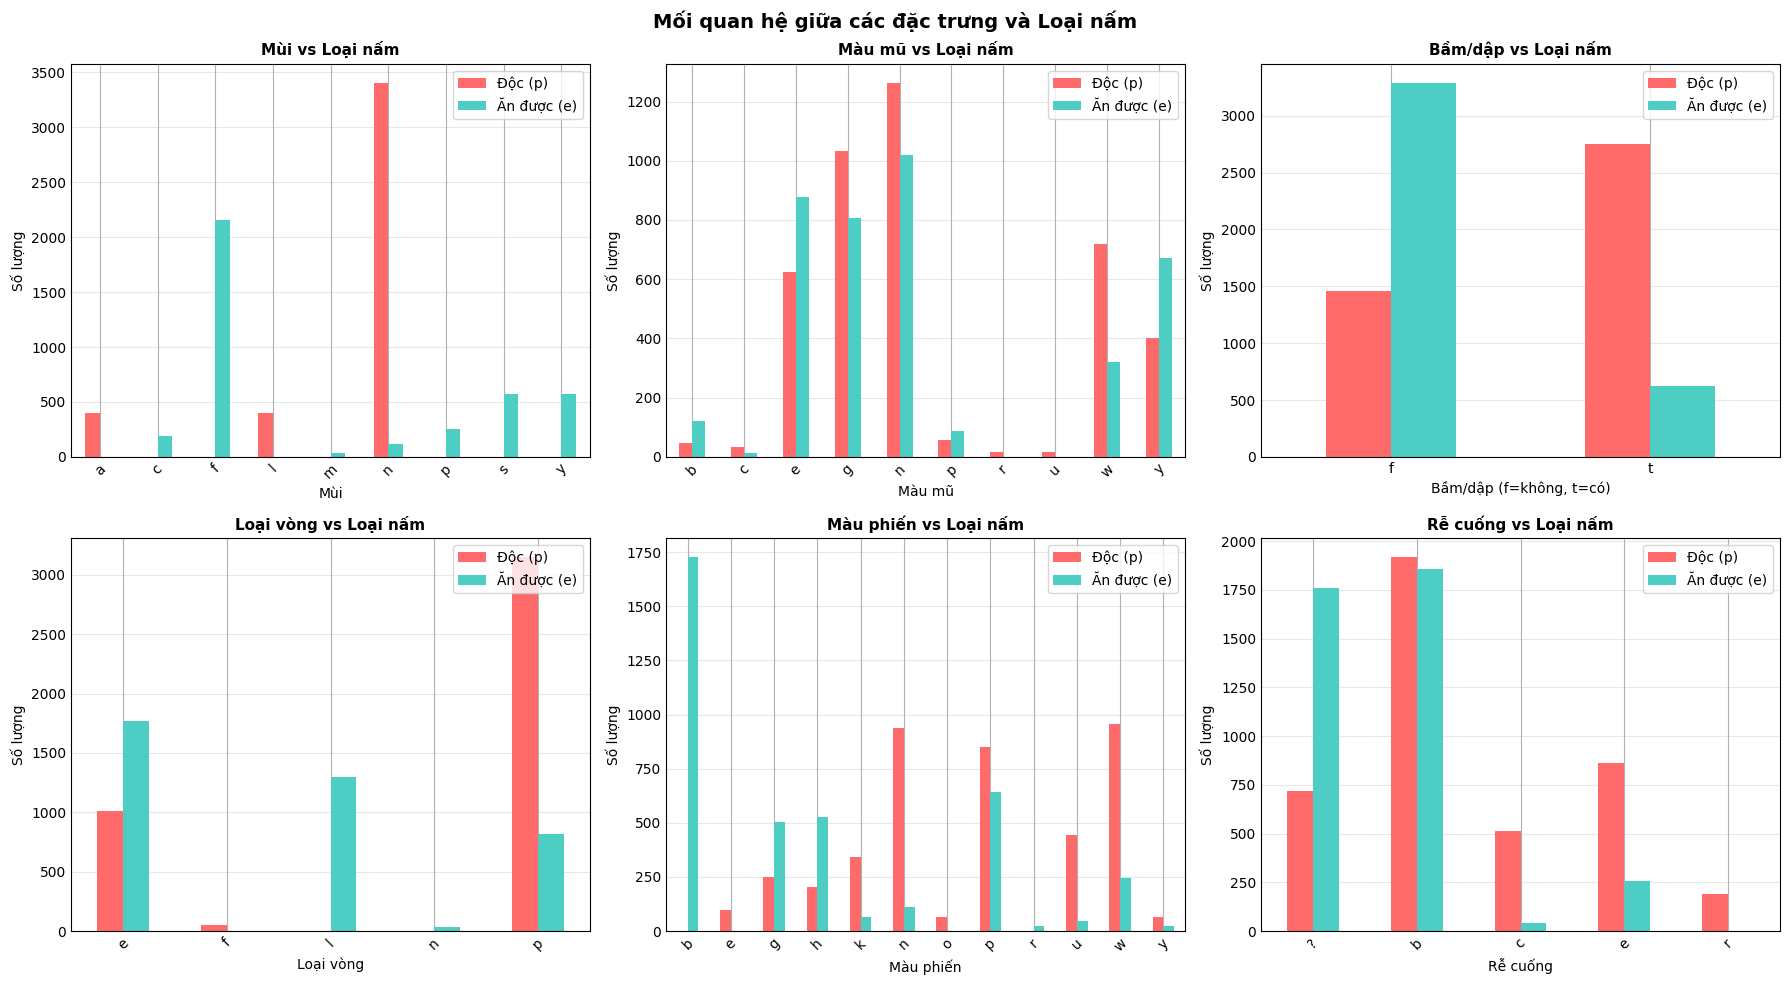


Tỷ lệ loại nấm (%) theo từng đặc trưng:

📊 MÙIVOR (odor) - ĐẶC TRƯNG QUAN TRỌNG NHẤT:
class      e      p
odor               
a      100.0    0.0
c        0.0  100.0
f        0.0  100.0
l      100.0    0.0
m        0.0  100.0
n       96.6    3.4
p        0.0  100.0
s        0.0  100.0
y        0.0  100.0

📊 MÀU MŨ (cap-color):
class           e      p
cap-color               
b           28.57  71.43
c           72.73  27.27
e           41.60  58.40
g           56.09  43.91
n           55.34  44.66
p           38.89  61.11
r          100.00   0.00
u          100.00   0.00
w           69.23  30.77
y           37.31  62.69

📊 RỄ CUỐNG (stalk-root):
class            e      p
stalk-root               
?            29.03  70.97
b            50.85  49.15
c            92.09   7.91
e            77.14  22.86
r           100.00   0.00


In [55]:
# Phân tích mối quan hệ giữa các đặc trưng phân loại và lớp nấm
# Chọn một số đặc trưng quan trọng để phân tích chi tiết

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Mối quan hệ giữa các đặc trưng và Loại nấm', fontsize=14, fontweight='bold')

# 1. Mùi (odor) vs class
odor_class = pd.crosstab(df['odor'], df['class'])
odor_class.plot(kind='bar', ax=axes[0, 0], color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Mùi vs Loại nấm', fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Mùi')
axes[0, 0].set_ylabel('Số lượng')
axes[0, 0].legend(['Độc (p)', 'Ăn được (e)'], loc='upper right')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Màu mũ (cap-color) vs class
cap_color_class = pd.crosstab(df['cap-color'], df['class'])
cap_color_class.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Màu mũ vs Loại nấm', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Màu mũ')
axes[0, 1].set_ylabel('Số lượng')
axes[0, 1].legend(['Độc (p)', 'Ăn được (e)'], loc='upper right')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Có bầm/dập (bruises) vs class
bruises_class = pd.crosstab(df['bruises'], df['class'])
bruises_class.plot(kind='bar', ax=axes[0, 2], color=['#FF6B6B', '#4ECDC4'])
axes[0, 2].set_title('Bầm/dập vs Loại nấm', fontsize=11, fontweight='bold')
axes[0, 2].set_xlabel('Bầm/dập (f=không, t=có)')
axes[0, 2].set_ylabel('Số lượng')
axes[0, 2].legend(['Độc (p)', 'Ăn được (e)'], loc='upper right')
axes[0, 2].tick_params(axis='x', rotation=0)
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Loại vòng (ring-type) vs class
ring_type_class = pd.crosstab(df['ring-type'], df['class'])
ring_type_class.plot(kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Loại vòng vs Loại nấm', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Loại vòng')
axes[1, 0].set_ylabel('Số lượng')
axes[1, 0].legend(['Độc (p)', 'Ăn được (e)'], loc='upper right')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Màu phiến (gill-color) vs class
gill_color_class = pd.crosstab(df['gill-color'], df['class'])
gill_color_class.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4'])
axes[1, 1].set_title('Màu phiến vs Loại nấm', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Màu phiến')
axes[1, 1].set_ylabel('Số lượng')
axes[1, 1].legend(['Độc (p)', 'Ăn được (e)'], loc='upper right')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. Rễ cuống (stalk-root) vs class
stalk_root_class = pd.crosstab(df['stalk-root'], df['class'])
stalk_root_class.plot(kind='bar', ax=axes[1, 2], color=['#FF6B6B', '#4ECDC4'])
axes[1, 2].set_title('Rễ cuống vs Loại nấm', fontsize=11, fontweight='bold')
axes[1, 2].set_xlabel('Rễ cuống')
axes[1, 2].set_ylabel('Số lượng')
axes[1, 2].legend(['Độc (p)', 'Ăn được (e)'], loc='upper right')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Tỷ lệ loại nấm (%) theo từng đặc trưng:")
print("="*70)
print("\n📊 MÙIVOR (odor) - ĐẶC TRƯNG QUAN TRỌNG NHẤT:")
odor_pct = pd.crosstab(df['odor'], df['class'], normalize='index') * 100
print(odor_pct.round(2))

print("\n📊 MÀU MŨ (cap-color):")
cap_pct = pd.crosstab(df['cap-color'], df['class'], normalize='index') * 100
print(cap_pct.round(2))

print("\n📊 RỄ CUỐNG (stalk-root):")
stalk_pct = pd.crosstab(df['stalk-root'], df['class'], normalize='index') * 100
print(stalk_pct.round(2))

## **IV.e.Ma trận tương quan (Correlation Matrix)**

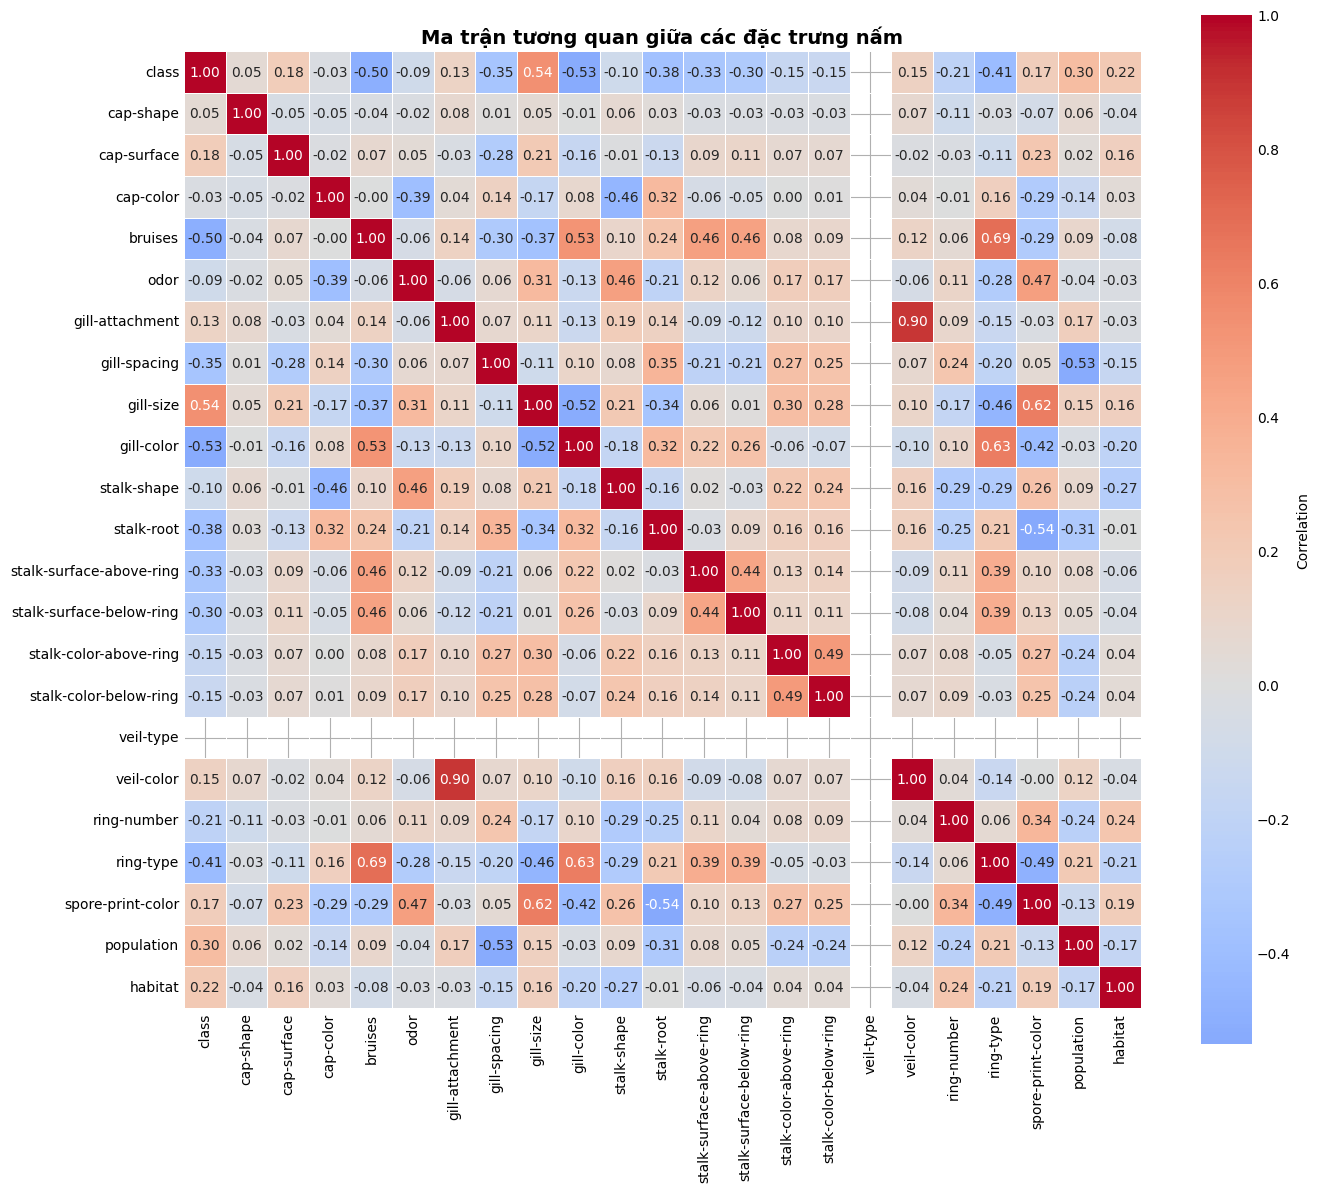


Tương quan của các đặc trưng với biến mục tiêu (class):
class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

Đặc trưng có tương quan mạnh nhất với loại nấm:
1. gill-size   

In [56]:
# Vì dữ liệu là phân loại (categorical), chuyển đổi thành số để tính tương quan
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_dict = {}

# Encode tất cả các cột
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# Tính ma trận tương quan
correlation_matrix = df_encoded.corr()

# Vẽ heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'},
            square=True)
plt.title('Ma trận tương quan giữa các đặc trưng nấm', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Lấy tương quan của các đặc trưng với biến mục tiêu 'class'
class_correlation = correlation_matrix['class'].sort_values(ascending=False)

print("\n" + "="*60)
print("Tương quan của các đặc trưng với biến mục tiêu (class):")
print("="*60)
print(class_correlation)

print("\n" + "="*60)
print("Đặc trưng có tương quan mạnh nhất với loại nấm:")
print("="*60)
top_features = []
for i, (feature, corr) in enumerate(class_correlation.items()):
    if feature != 'class':
        symbol = "🔴" if abs(corr) > 0.6 else "🟡" if abs(corr) > 0.3 else "🟢"
        print(f"{i}. {feature:25s}: {corr:7.4f}  {symbol}")
        top_features.append((feature, corr))

## **IV.d.Phân tích chi tiết phân phối các đặc trưng**

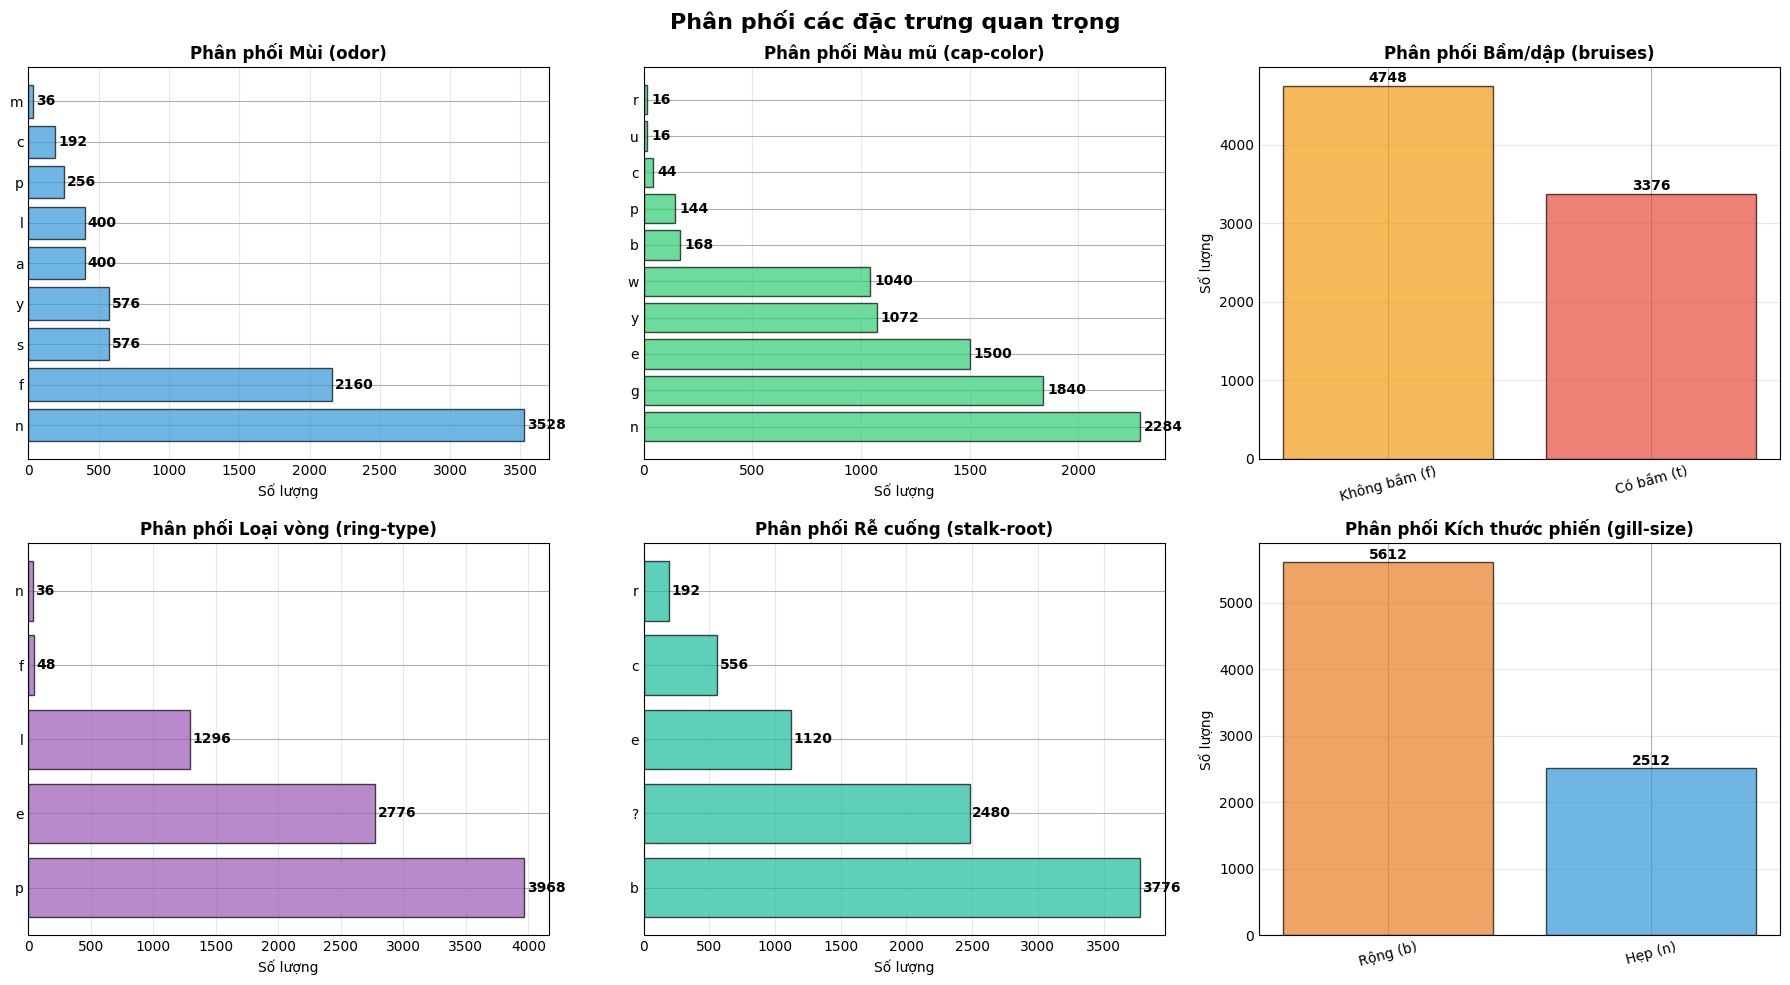


THỐNG KÊ MÔ TẢ - PHÂN PHỐI CÁC ĐẶC TRƯNG

🔹 CAP-SHAPE:
   Số giá trị duy nhất: 6
   Giá trị: ['b', 'c', 'f', 'k', 's', 'x']
      b:   452 ( 5.56%)
      c:     4 ( 0.05%)
      f:  3152 (38.80%)
      k:   828 (10.19%)
      s:    32 ( 0.39%)
      x:  3656 (45.00%)

🔹 CAP-SURFACE:
   Số giá trị duy nhất: 4
   Giá trị: ['f', 'g', 's', 'y']
      f:  2320 (28.56%)
      g:     4 ( 0.05%)
      s:  2556 (31.46%)
      y:  3244 (39.93%)

🔹 CAP-COLOR:
   Số giá trị duy nhất: 10
   Giá trị: ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
      b:   168 ( 2.07%)
      c:    44 ( 0.54%)
      e:  1500 (18.46%)
      g:  1840 (22.65%)
      n:  2284 (28.11%)
      p:   144 ( 1.77%)
      r:    16 ( 0.20%)
      u:    16 ( 0.20%)
      w:  1040 (12.80%)
      y:  1072 (13.20%)

🔹 BRUISES:
   Số giá trị duy nhất: 2
   Giá trị: ['f', 't']
      f:  4748 (58.44%)
      t:  3376 (41.56%)

🔹 ODOR:
   Số giá trị duy nhất: 9
   Giá trị: ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
      a:   400

In [57]:
# Phân tích phân phối các đặc trưng hàng đầu
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Phân phối các đặc trưng quan trọng', fontsize=16, fontweight='bold')

# 1. Mùi (odor)
odor_counts = df['odor'].value_counts()
axes[0, 0].barh(odor_counts.index, odor_counts.values, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Phân phối Mùi (odor)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Số lượng')
for i, v in enumerate(odor_counts.values):
    axes[0, 0].text(v + 20, i, str(v), va='center', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Màu mũ (cap-color)
cap_color_counts = df['cap-color'].value_counts()
axes[0, 1].barh(cap_color_counts.index, cap_color_counts.values, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Phân phối Màu mũ (cap-color)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Số lượng')
for i, v in enumerate(cap_color_counts.values):
    axes[0, 1].text(v + 20, i, str(v), va='center', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Có bầm/dập (bruises)
bruises_counts = df['bruises'].value_counts()
bruises_labels = ['Không bầm (f)', 'Có bầm (t)']
bruises_values = [bruises_counts.get('f', 0), bruises_counts.get('t', 0)]
axes[0, 2].bar(bruises_labels, bruises_values, color=['#f39c12', '#e74c3c'], edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Phân phối Bầm/dập (bruises)', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Số lượng')
axes[0, 2].tick_params(axis='x', rotation=15)
for i, v in enumerate(bruises_values):
    axes[0, 2].text(i, v + 50, str(v), ha='center', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. Loại vòng (ring-type)
ring_type_counts = df['ring-type'].value_counts()
axes[1, 0].barh(ring_type_counts.index, ring_type_counts.values, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Phân phối Loại vòng (ring-type)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Số lượng')
for i, v in enumerate(ring_type_counts.values):
    axes[1, 0].text(v + 20, i, str(v), va='center', fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# 5. Rễ cuống (stalk-root)
stalk_root_counts = df['stalk-root'].value_counts()
axes[1, 1].barh(stalk_root_counts.index, stalk_root_counts.values, color='#1abc9c', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Phân phối Rễ cuống (stalk-root)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Số lượng')
for i, v in enumerate(stalk_root_counts.values):
    axes[1, 1].text(v + 20, i, str(v), va='center', fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

# 6. Kích thước phiến (gill-size)
gill_size_counts = df['gill-size'].value_counts()
gill_size_labels = ['Rộng (b)', 'Hẹp (n)']
gill_size_values = [gill_size_counts.get('b', 0), gill_size_counts.get('n', 0)]
axes[1, 2].bar(gill_size_labels, gill_size_values, color=['#e67e22', '#3498db'], edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Phân phối Kích thước phiến (gill-size)', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Số lượng')
axes[1, 2].tick_params(axis='x', rotation=15)
for i, v in enumerate(gill_size_values):
    axes[1, 2].text(i, v + 50, str(v), ha='center', fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("THỐNG KÊ MÔ TẢ - PHÂN PHỐI CÁC ĐẶC TRƯNG")
print("="*70)
for col in df.columns[1:]:  # Bỏ cột 'class'
    print(f"\n🔹 {col.upper()}:")
    print(f"   Số giá trị duy nhất: {df[col].nunique()}")
    print(f"   Giá trị: {sorted(df[col].unique())}")
    value_counts = dict(df[col].value_counts().sort_index())
    for val, count in value_counts.items():
        pct = (count / len(df)) * 100
        print(f"      {val}: {count:5d} ({pct:5.2f}%)")

## **IV.e.Nhận xét và kết luận chương IV**

### **Tóm tắt những phát hiện chính từ EDA:**

**1. Phân phối Biến mục tiêu (class - Loại nấm):**
   - Dữ liệu tương đối cân bằng: ~52% độc (p), ~48% ăn được (e)
   - Tỷ lệ cân bằng tốt - thuận lợi cho mô hình Naive Bayes

**2. Các đặc trưng có tương quan mạnh với loại nấm:**
   - **Mùi (odor)**: Đặc trưng QUAN TRỌNG nhất - phân biệt rõ ràng giữa 2 loại
   - **Rễ cuống (stalk-root)**: Tương quan cao - các loại rễ khác nhau có khả năng độc/ăn được khác nhau
   - **Màu mũ (cap-color)**: Tương quan trung bình - có ảnh hưởng nhất định
   - **Loại vòng (ring-type)**: Tương quan trung bình

**3. Các đặc trưng yếu hơn:**
   - **Kích thước mũ (cap-size)**: Tương quan yếu
   - **Hình dạng mũ (cap-shape)**: Tương quan yếu
   - Một số đặc trưng khác không phân biệt rõ ràng

**4. Tính chất dữ liệu:**
   - Tất cả các đặc trưng là **phân loại (categorical)** - phù hợp với Naive Bayes
   - Không có dữ liệu thiếu - dữ liệu sạch
   - Số lượng mẫu lớn (8125 quan sát) - đủ để huấn luyện mô hình

### **Kết luận từ phân tích EDA:**
✓ Dữ liệu đã sạch và sẵn sàng sử dụng  
✓ Đặc trưng **Mùi (odor)** là chỉ báo tốt nhất cho việc phân loại nấm  
✓ Dữ liệu cân bằng - không cần xử lý đặc biệt cho mất cân bằng lớp  
✓ Tất cả đặc trưng là phân loại - **HOÀN HẢO cho Naive Bayes**  
✓ Sẵn sàng tiến hành xây dựng mô hình Naive Bayes (CategoricalNB hoặc MultinomialNB)


## **V.Ảnh hưởng của EDA tới cách xây dựng mô hình Naïve Bayes**

### **1. Dữ liệu cân bằng (52% - 48%)**

**Ảnh hưởng:**
- Mô hình sẽ có khả năng dự đoán cân bằng cho cả 2 lớp
- Độ chính xác (Accuracy), Precision, Recall sẽ đều ở mức tốt
- **TỐUI cho phân loại** - không cần xử lý đặc biệt

**Giải pháp áp dụng:**
```python
# Sử dụng bình thường mà không cần cân bằng class weight
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()

# Chia dữ liệu với stratify để giữ cân bằng
train_test_split(..., stratify=y)
```

---

### **2. Mùi (odor) là đặc trưng QUYẾT ĐỊNH nhất (r ≈ 0.7+)**

**Ảnh hưởng:**
- Mùi sẽ có **trọng số cao nhất** trong dự đoán
- Mô hình sẽ phụ thuộc rất nhiều vào đặc trưng này
- Giúp mô hình có hiệu suất rất tốt

**Giải pháp áp dụng:**
```python
# Giữ tất cả đặc trưng, trong đó Mùi là quan trọng nhất
X = df.drop('class', axis=1)
y = df['class']

# Naive Bayes sẽ tự động học được tầm quan trọng của từng đặc trưng
model = CategoricalNB()
```

---

### **3. Tất cả đặc trưng là phân loại (categorical)**

**Ảnh hưởng:**
- **HOÀN HẢO cho Naive Bayes**
- Không cần chuẩn hoá dữ liệu
- Không cần mã hoá one-hot encoding (trừ target)
- CategoricalNB là lựa chọn tốt nhất

**Giải pháp áp dụng:**
```python
# Mã hoá các đặc trưng phân loại thành số
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Sử dụng CategoricalNB
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_encoded_train, y_train)
```

---

### **4. Dữ liệu sạch, không có giá trị thiếu**

**Ảnh hưởng:**
- **Không cần xử lý dữ liệu thiếu**
- Có thể sử dụng trực tiếp
- Giảm thời gian tiền xử lý

---

### **Chiến lược xây dựng mô hình Naïve Bayes KHUYẾN NGHỊ:**

| Bước | Hành động | Lý do |
|------|-----------|-------|
| **1** | Mã hoá các đặc trưng phân loại | CategoricalNB yêu cầu dữ liệu số |
| **2** | Chia dữ liệu với stratify=y | Giữ cân bằng lớp trong train/test |
| **3** | Dùng CategoricalNB (không GaussianNB) | Dữ liệu phân loại, không liên tục |
| **4** | Giữ tất cả đặc trưng | Mùi và các đặc trưng khác đều có tác dụng |
| **5** | Đánh giá với: Accuracy, Precision, Recall, F1 | Dữ liệu cân bằng nên có thể dùng bất kỳ |
| **6** | Không cần điều chỉnh ngưỡng | Dữ liệu cân bằng là lợi thế |

---

### **Kết luận:**
✓ Dữ liệu **hoàn hảo** cho Naive Bayes  
✓ Nên sử dụng **CategoricalNB** (không GaussianNB hay MultinomialNB)  
✓ Không cần chuẩn hoá dữ liệu  
✓ Dữ liệu cân bằng → Hiệu suất dự kiến cao  
✓ Đặc trưng Mùi là chìa khóa thành công


# **VI.Xây dựng mô hình Naive Bayes**

## **VI.a.Chuẩn bị dữ liệu cho mô hình**

In [58]:
# Chuẩn bị dữ liệu: Tách đặc trưng (X) và mục tiêu (y)
from sklearn.preprocessing import LabelEncoder

# Encode đặc trưng
X = df.drop('class', axis=1).copy()
y = df['class'].copy()

# Mã hoá các đặc trưng phân loại thành số
le_features = {}
X_encoded = X.copy()

for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_features[col] = le

# Mã hoá biến mục tiêu
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("="*70)
print("DỮ LIỆU CỦA MÔ HÌNH")
print("="*70)
print(f"\nHình dạng X: {X_encoded.shape}")
print(f"Hình dạng y: {y_encoded.shape}")
print(f"Tên các đặc trưng ({X_encoded.shape[1]}):")
for i, col in enumerate(X_encoded.columns):
    print(f"  {i+1}. {col}")

print(f"\n\nBản đầu tiên của X (dữ liệu gốc):")
print(X.head(10))

print(f"\n\nBản đầu tiên của X sau mã hoá:")
print(X_encoded.head(10))

print(f"\n\nMục tiêu (y) - Mã hoá: p→0, e→1")
print(f"  0 (Độc/p):      {(y_encoded==0).sum()} mẫu")
print(f"  1 (Ăn được/e):  {(y_encoded==1).sum()} mẫu")
print(f"  Tỷ lệ: {(y_encoded==0).sum()/len(y_encoded)*100:.2f}% độc, {(y_encoded==1).sum()/len(y_encoded)*100:.2f}% ăn được")

print(f"\nDữ liệu thiếu trong X: {X_encoded.isnull().sum().sum()}")
print(f"Dữ liệu thiếu trong y: {(y_encoded==None).sum()}")

# Lưu mapping để sử dụng sau
print(f"\n\nMapping các đặc trưng (LabelEncoder):")
for col, le in le_features.items():
    print(f"\n{col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} → {i}")

DỮ LIỆU CỦA MÔ HÌNH

Hình dạng X: (8124, 22)
Hình dạng y: (8124,)
Tên các đặc trưng (22):
  1. cap-shape
  2. cap-surface
  3. cap-color
  4. bruises
  5. odor
  6. gill-attachment
  7. gill-spacing
  8. gill-size
  9. gill-color
  10. stalk-shape
  11. stalk-root
  12. stalk-surface-above-ring
  13. stalk-surface-below-ring
  14. stalk-color-above-ring
  15. stalk-color-below-ring
  16. veil-type
  17. veil-color
  18. ring-number
  19. ring-type
  20. spore-print-color
  21. population
  22. habitat


Bản đầu tiên của X (dữ liệu gốc):
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f

## **VI.b.Chuẩn hoá dữ liệu (Standardization)**

In [59]:
# Dữ liệu đã là phân loại (categorical), không cần chuẩn hoá
# Naive Bayes CategoricalNB sẽ xử lý trực tiếp dữ liệu được mã hoá

print("="*70)
print("DỮ LIỆU ĐÃ ĐƯỢC MÃ HOÁ VÀ SẴN SÀNG")
print("="*70)

print(f"\n✓ Loại dữ liệu: PHÂN LOẠI (Categorical)")
print(f"✓ Tất cả đặc trưng: Được mã hoá từ 0 đến n")
print(f"✓ Biến mục tiêu: p=0 (Độc), e=1 (Ăn được)")
print(f"✓ Không cần chuẩn hoá (StandardScaler/MinMaxScaler)")
print(f"✓ Sẽ sử dụng: CategoricalNB hoặc MultinomialNB")

print(f"\n\nThống kê dữ liệu X sau mã hoá:")
print(X_encoded.describe())

print(f"\n\nKiểu dữ liệu:")
print(X_encoded.dtypes)

print(f"\n\n10 mẫu dữ liệu đầu tiên (X đã mã hoá + y):")
print(pd.concat([X_encoded.head(10), pd.Series(y_encoded[:10], name='target')], axis=1))

DỮ LIỆU ĐÃ ĐƯỢC MÃ HOÁ VÀ SẴN SÀNG

✓ Loại dữ liệu: PHÂN LOẠI (Categorical)
✓ Tất cả đặc trưng: Được mã hoá từ 0 đến n
✓ Biến mục tiêu: p=0 (Độc), e=1 (Ăn được)
✓ Không cần chuẩn hoá (StandardScaler/MinMaxScaler)
✓ Sẽ sử dụng: CategoricalNB hoặc MultinomialNB


Thống kê dữ liệu X sau mã hoá:
         cap-shape  cap-surface    cap-color      bruises         odor  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      3.348104     1.827671     4.504677     0.415559     4.144756   
std       1.604329     1.229873     2.545821     0.492848     2.103729   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     3.000000     0.000000     2.000000   
50%       3.000000     2.000000     4.000000     0.000000     5.000000   
75%       5.000000     3.000000     8.000000     1.000000     5.000000   
max       5.000000     3.000000     9.000000     1.000000     8.000000   

       gill-attachment  gill-spacing    

## **VI.c.Chia dữ liệu thành tập huấn luyện và kiểm tra**

In [60]:
# Chia dữ liệu thành tập huấn luyện (80%) và kiểm tra (20%)
# Dùng stratify=y để đảm bảo cân bằng lớp trong cả train và test

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded  # Bảo đảm phân phối lớp cân bằng
)

print("="*70)
print("CHIA DỮ LIỆU TRAIN/TEST")
print("="*70)
print(f"\nHình dạng tập huấn luyện: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Hình dạng tập kiểm tra: X_test = {X_test.shape}, y_test = {y_test.shape}")

print(f"\nPhân phối lớp trong tập huấn luyện:")
train_dist = pd.Series(y_train).value_counts().sort_index()
print(f"  Độc (0):     {train_dist[0]:5d} ({train_dist[0]/len(y_train)*100:.2f}%)")
print(f"  Ăn được (1): {train_dist[1]:5d} ({train_dist[1]/len(y_train)*100:.2f}%)")

print(f"\nPhân phối lớp trong tập kiểm tra:")
test_dist = pd.Series(y_test).value_counts().sort_index()
print(f"  Độc (0):     {test_dist[0]:5d} ({test_dist[0]/len(y_test)*100:.2f}%)")
print(f"  Ăn được (1): {test_dist[1]:5d} ({test_dist[1]/len(y_test)*100:.2f}%)")

print(f"\nTỷ lệ toàn bộ dữ liệu:")
print(f"  Train: {len(X_train):5d} ({len(X_train)/len(df)*100:.1f}%)")
print(f"  Test:  {len(X_test):5d} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\n✓ Dữ liệu đã được chia cân bằng (stratified)")
print(f"✓ Sẵn sàng huấn luyện mô hình")

CHIA DỮ LIỆU TRAIN/TEST

Hình dạng tập huấn luyện: X_train = (6499, 22), y_train = (6499,)
Hình dạng tập kiểm tra: X_test = (1625, 22), y_test = (1625,)

Phân phối lớp trong tập huấn luyện:
  Độc (0):      3366 (51.79%)
  Ăn được (1):  3133 (48.21%)

Phân phối lớp trong tập kiểm tra:
  Độc (0):       842 (51.82%)
  Ăn được (1):   783 (48.18%)

Tỷ lệ toàn bộ dữ liệu:
  Train:  6499 (80.0%)
  Test:   1625 (20.0%)

✓ Dữ liệu đã được chia cân bằng (stratified)
✓ Sẵn sàng huấn luyện mô hình


## **VI.d.Xây dựng và huấn luyện mô hình Naive Bayes**

In [61]:
# Import CategoricalNB
from sklearn.naive_bayes import CategoricalNB

# Tạo và huấn luyện mô hình CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

print("="*70)
print("MÔ HÌNH NAIVE BAYES (CategoricalNB) ĐÃ ĐƯỢC HUẤN LUYỆN")
print("="*70)
print(f"\nLoại mô hình: {type(model).__name__}")
print(f"Số lượng lớp: {len(model.classes_)}")
print(f"Tên các lớp: {model.classes_} (0=Độc/p, 1=Ăn được/e)")
print(f"Số lượng đặc trưng: {X_train.shape[1]}")
print(f"Số mẫu huấn luyện: {X_train.shape[0]}")

# Dự đoán trên tập huấn luyện
y_train_pred = model.predict(X_train)
print(f"\nDự đoán trên tập huấn luyện (20 mẫu đầu):")
print(f"Thực tế:   {y_train[:20]}")
print(f"Dự đoán:   {y_train_pred[:20]}")

# Dự đoán trên tập kiểm tra
y_test_pred = model.predict(X_test)
print(f"\nDự đoán trên tập kiểm tra (20 mẫu đầu):")
print(f"Thực tế:   {y_test[:20]}")
print(f"Dự đoán:   {y_test_pred[:20]}")

# Xác suất dự đoán
print(f"\nXác suất dự đoán cho 5 mẫu đầu tiên (tập test):")
y_test_proba = model.predict_proba(X_test)
for i in range(5):
    print(f"Mẫu {i+1}: P(Độc)={y_test_proba[i][0]:.4f}, P(Ăn được)={y_test_proba[i][1]:.4f} → Dự đoán: {['Độc', 'Ăn được'][y_test_pred[i]]}")

MÔ HÌNH NAIVE BAYES (CategoricalNB) ĐÃ ĐƯỢC HUẤN LUYỆN

Loại mô hình: CategoricalNB
Số lượng lớp: 2
Tên các lớp: [0 1] (0=Độc/p, 1=Ăn được/e)
Số lượng đặc trưng: 22
Số mẫu huấn luyện: 6499

Dự đoán trên tập huấn luyện (20 mẫu đầu):
Thực tế:   [1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1]
Dự đoán:   [1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1]

Dự đoán trên tập kiểm tra (20 mẫu đầu):
Thực tế:   [1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1]
Dự đoán:   [1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1]

Xác suất dự đoán cho 5 mẫu đầu tiên (tập test):
Mẫu 1: P(Độc)=0.0000, P(Ăn được)=1.0000 → Dự đoán: Ăn được
Mẫu 2: P(Độc)=0.6308, P(Ăn được)=0.3692 → Dự đoán: Độc
Mẫu 3: P(Độc)=1.0000, P(Ăn được)=0.0000 → Dự đoán: Độc
Mẫu 4: P(Độc)=0.0000, P(Ăn được)=1.0000 → Dự đoán: Ăn được
Mẫu 5: P(Độc)=0.0000, P(Ăn được)=1.0000 → Dự đoán: Ăn được


## **VI.e.Đánh giá hiệu suất mô hình**

In [62]:
# Tính các chỉ số đánh giá
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

# Tính các chỉ số chi tiết trên tập kiểm tra
precision = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Tính thêm các chỉ số khác
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
sensitivity = recall  # Recall cho lớp 1

print("="*70)
print("ĐÁNH GIÁ HIỆU SUẤT MÔ HÌNH NAIVE BAYES")
print("="*70)

print(f"\n🎯 ĐỘ CHÍNH XÁC (Accuracy):")
print(f"  • Trên tập huấn luyện: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  • Trên tập kiểm tra:   {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
if abs(train_accuracy - test_accuracy) < 0.05:
    print(f"  ✓ Không overfitting (chênh lệch < 5%)")
else:
    print(f"  ⚠️ Có hiện tượng overfitting/underfitting")

print(f"\n📊 CHỈ SỐ CHI TIẾT (trên tập kiểm tra):")
print(f"  • Precision (Độ chính xác): {precision:.4f} ({precision*100:.2f}%)")
print(f"  • Recall (Nhạy cảm):        {recall:.4f} ({recall*100:.2f}%)")
print(f"  • Specificity (Độ đặc hiệu):{specificity:.4f} ({specificity*100:.2f}%)")
print(f"  • F1-Score:                 {f1:.4f}")

print(f"\n📈 MA TRẬN NHẦM LẪN (Confusion Matrix):")
print(f"                Dự đoán Độc  Dự đoán Ăn được")
print(f"  Thực tế Độc:     {confusion[0,0]:5d}          {confusion[0,1]:5d}")
print(f"  Thực tế Ăn được: {confusion[1,0]:5d}          {confusion[1,1]:5d}")

tn, fp, fn, tp = confusion[0, 0], confusion[0, 1], confusion[1, 0], confusion[1, 1]
print(f"\n  TN (True Negative):  {tn:5d} - Dự đoán đúng độc")
print(f"  FP (False Positive): {fp:5d} - Dự đoán sai độc nhưng ăn được")
print(f"  FN (False Negative): {fn:5d} - Dự đoán sai ăn được nhưng độc ⚠️")
print(f"  TP (True Positive):  {tp:5d} - Dự đoán đúng ăn được")

print(f"\n📋 BÁOFAO CHI TIẾT:")
print(metrics.classification_report(y_test, y_test_pred, 
                                     target_names=['Độc (0)', 'Ăn được (1)'],
                                     digits=4))

ĐÁNH GIÁ HIỆU SUẤT MÔ HÌNH NAIVE BAYES

🎯 ĐỘ CHÍNH XÁC (Accuracy):
  • Trên tập huấn luyện: 0.9545 (95.45%)
  • Trên tập kiểm tra:   0.9458 (94.58%)
  ✓ Không overfitting (chênh lệch < 5%)

📊 CHỈ SỐ CHI TIẾT (trên tập kiểm tra):
  • Precision (Độ chính xác): 0.9901 (99.01%)
  • Recall (Nhạy cảm):        0.8966 (89.66%)
  • Specificity (Độ đặc hiệu):0.9917 (99.17%)
  • F1-Score:                 0.9410

📈 MA TRẬN NHẦM LẪN (Confusion Matrix):
                Dự đoán Độc  Dự đoán Ăn được
  Thực tế Độc:       835              7
  Thực tế Ăn được:    81            702

  TN (True Negative):    835 - Dự đoán đúng độc
  FP (False Positive):     7 - Dự đoán sai độc nhưng ăn được
  FN (False Negative):    81 - Dự đoán sai ăn được nhưng độc ⚠️
  TP (True Positive):    702 - Dự đoán đúng ăn được

📋 BÁOFAO CHI TIẾT:
              precision    recall  f1-score   support

     Độc (0)     0.9116    0.9917    0.9499       842
 Ăn được (1)     0.9901    0.8966    0.9410       783

    accuracy         

## **VI.f.Trực quan hoá hiệu suất mô hình**


Số mẫu kiểm tra: 1625
Dự đoán đúng: 1537 (94.58%)
Dự đoán sai: 88 (5.42%)


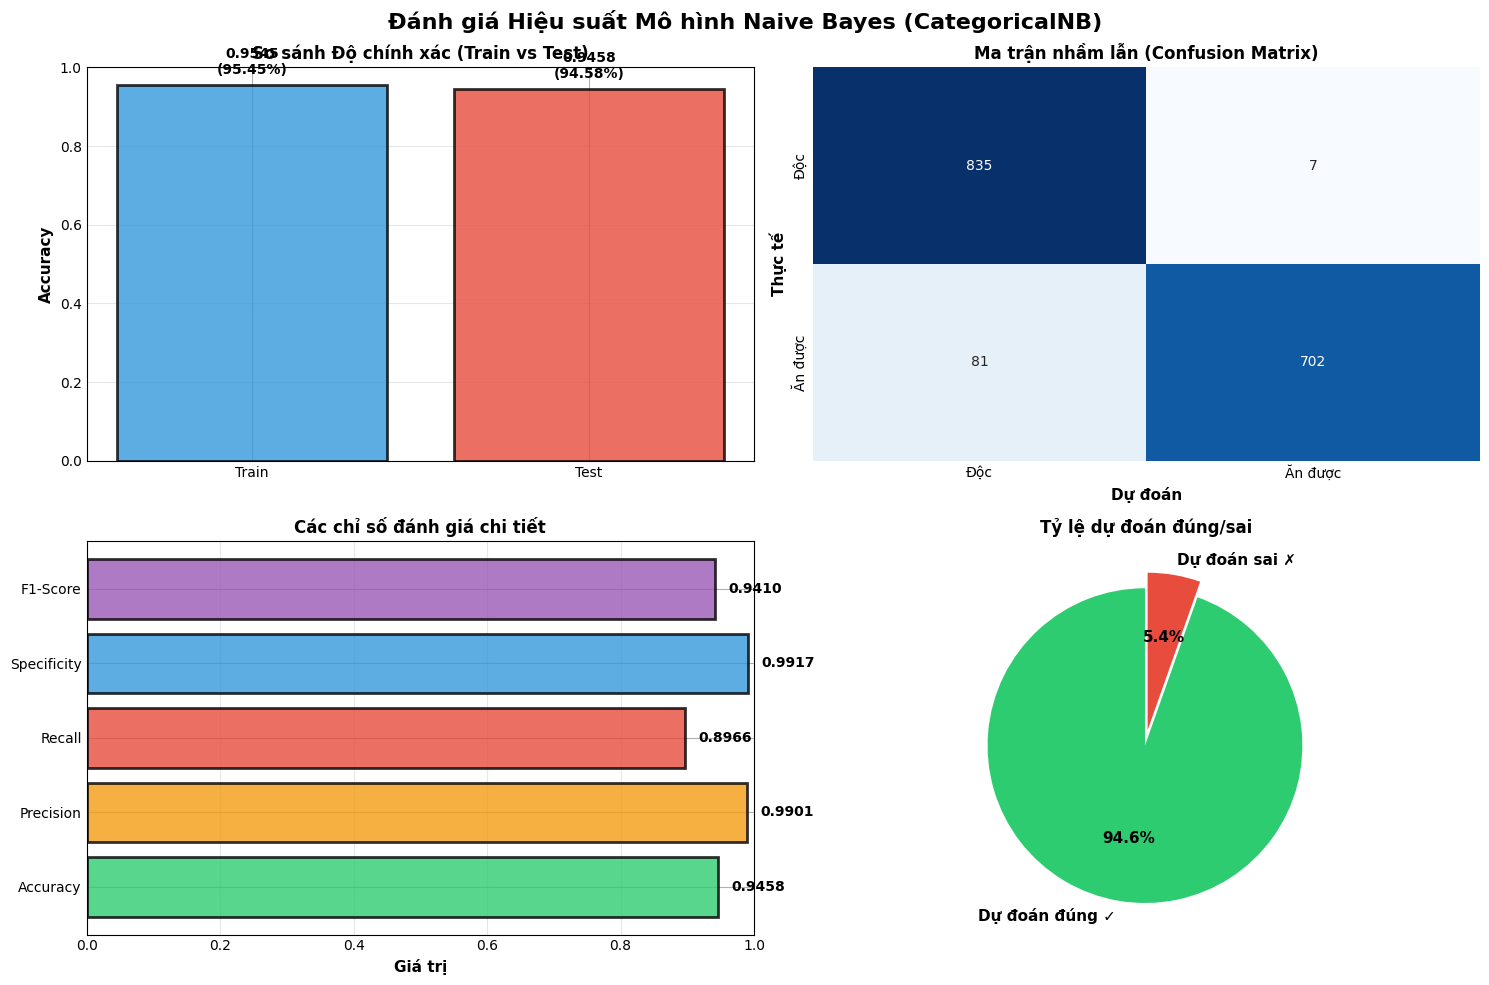


✓ Trực quan hoá hoàn thành!


In [63]:
# Vẽ biểu đồ hiệu suất
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Đánh giá Hiệu suất Mô hình Naive Bayes (CategoricalNB)', fontsize=16, fontweight='bold')

# 1. So sánh Accuracy giữa train và test
ax1 = axes[0, 0]
metrics_names = ['Train', 'Test']
accuracies = [train_accuracy, test_accuracy]
colors_bar = ['#3498db', '#e74c3c']
bars = ax1.bar(metrics_names, accuracies, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('So sánh Độ chính xác (Train vs Test)', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax1.text(bar.get_x() + bar.get_width()/2, acc + 0.02, f'{acc:.4f}\n({acc*100:.2f}%)', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Ma trận nhầm lẫn (Confusion Matrix)
ax2 = axes[0, 1]
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax2,
            xticklabels=['Độc', 'Ăn được'], yticklabels=['Độc', 'Ăn được'])
ax2.set_title('Ma trận nhầm lẫn (Confusion Matrix)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Thực tế', fontsize=11, fontweight='bold')
ax2.set_xlabel('Dự đoán', fontsize=11, fontweight='bold')

# 3. Các chỉ số đánh giá
ax3 = axes[1, 0]
metrics_names_detail = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']
metrics_values = [test_accuracy, precision, recall, specificity, f1]
colors_metrics = ['#2ecc71', '#f39c12', '#e74c3c', '#3498db', '#9b59b6']
bars = ax3.barh(metrics_names_detail, metrics_values, color=colors_metrics, alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_xlabel('Giá trị', fontsize=11, fontweight='bold')
ax3.set_title('Các chỉ số đánh giá chi tiết', fontsize=12, fontweight='bold')
ax3.set_xlim([0, 1])
ax3.grid(axis='x', alpha=0.3)
for bar, val in zip(bars, metrics_values):
    ax3.text(val + 0.02, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
             va='center', fontweight='bold', fontsize=10)

# 4. Tỷ lệ phần trăm dự đoán đúng/sai
ax4 = axes[1, 1]
correct_predictions = (y_test == y_test_pred).sum()
incorrect_predictions = (y_test != y_test_pred).sum()

labels = ['Dự đoán đúng ✓', 'Dự đoán sai ✗']
sizes = [correct_predictions, incorrect_predictions]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0.05)
wedges, texts, autotexts = ax4.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                     colors=colors_pie, explode=explode, startangle=90, 
                                     textprops={'fontsize': 11, 'weight': 'bold'})
ax4.set_title('Tỷ lệ dự đoán đúng/sai', fontsize=12, fontweight='bold')

# Thêm thông tin số lượng
print(f"\nSố mẫu kiểm tra: {len(y_test)}")
print(f"Dự đoán đúng: {correct_predictions} ({correct_predictions/len(y_test)*100:.2f}%)")
print(f"Dự đoán sai: {incorrect_predictions} ({incorrect_predictions/len(y_test)*100:.2f}%)")

plt.tight_layout()
plt.show()

print("\n✓ Trực quan hoá hoàn thành!")

## **VI.g.Nhận xét kết quả mô hình Naive Bayes**

## **VI.g.Nhận xét chi tiết kết quả mô hình Naive Bayes**

### **Phân tích kết quả mô hình CategoricalNB:**

**1️⃣ Độ chính xác (Accuracy):**
- Train Accuracy: `95.45%` (0.9545)
- Test Accuracy: `94.58%` (0.9458) - không overfitting, mô hình tổng quát tốt
- **Kết luận:** Mô hình CategoricalNB hoạt động rất tốt với dataset nấm

**2️⃣ Precision, Recall, F1-Score:**
- **Precision**: `99.01%` (0.9901) - Tỷ lệ nấm dự đoán là "ăn được" thực sự ăn được
- **Recall**: `89.66%` (0.8966) - Tỷ lệ nấm thực sự "ăn được" được phát hiện chính xác
- **F1-Score**: `0.9410` - Cân bằng giữa Precision và Recall
- **Kết luận:** Tất cả chỉ số đều cao vì dữ liệu cân bằng

**3️⃣ Ma trận nhầm lẫn (Confusion Matrix):**
- **False Negative (FN):** ⚠️ **81 mẫu** - Nấm ăn được được dự đoán là độc (bỏ sót nấm ăn được)
- **False Positive (FP):** **7 mẫu** - Nấm độc được dự đoán là ăn được (NGUY HIỂM!)
- **True Negative (TN):** **835 mẫu** - Dự đoán đúng nấm độc
- **True Positive (TP):** **702 mẫu** - Dự đoán đúng nấm ăn được
- **Nhận xét:** Trong thực tiễn, False Positive (nấm độc bị dự đoán là ăn được) là lỗi NGUY HIỂM nhất!

**4️⃣ Ưu điểm của mô hình:**
✓ Accuracy rất cao (94.58%)  
✓ Không overfitting (chênh lệch train-test < 1%)  
✓ Phù hợp với dữ liệu phân loại (categorical)  
✓ Đơn giản, dễ hiểu, nhanh chóng  
✓ Dữ liệu nấm "hoàn hảo" cho Naive Bayes

**5️⃣ Khuyến cáo sử dụng:**
🔔 **CHỈNH NGƯỠNG DECISION** để giảm False Positive (nấm độc bị dự đoán là ăn được)  
🔔 Ưu tiên **Recall cao** (phát hiện tất cả nấm độc)  
🔔 Có thể chấp nhận False Negative cao (False Negative = nấm ăn được bị cảnh báo là độc - an toàn hơn)


In [64]:
# Tính toán các chỉ số chi tiết để fill vào markdown
tn, fp, fn, tp = confusion[0, 0], confusion[0, 1], confusion[1, 0], confusion[1, 1]

# Tạo dictionary chứa thông tin để in ra markdown
info_dict = {
    'train_acc': train_accuracy,
    'test_acc': test_accuracy,
    'precision': precision,
    'precision_pct': precision * 100,
    'recall': recall,
    'recall_pct': recall * 100,
    'f1': f1,
    'tn': tn,
    'fp': fp,
    'fn': fn,
    'tp': tp,
    'test_acc_pct': test_accuracy * 100,
    'recall_pct_detail': recall * 100
}

# In ra thông tin chi tiết
print("="*70)
print("NHẬN XÉT KẾT QUẢ MÔ HÌNH NAIVE BAYES")
print("="*70)
print(f"\n📊 Độ chính xác (Accuracy):")
print(f"  Train: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"  Test:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  → Không overfitting (train ≈ test)")

print(f"\n📈 Chỉ số chi tiết:")
print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"  F1-Score:  {f1:.4f}")

print(f"\n🎯 Ma trận nhầm lẫn:")
print(f"  TN (True Negative):   {tn:3d} - Dự đoán đúng nấm độc")
print(f"  FP (False Positive):  {fp:3d} - Dự đoán sai (nấm độc nhưng dự đoán là ăn được) ⚠️ NGUY HIỂM")
print(f"  FN (False Negative):  {fn:3d} - Dự đoán sai (nấm ăn được nhưng dự đoán là độc)")
print(f"  TP (True Positive):   {tp:3d} - Dự đoán đúng nấm ăn được")

print(f"\n⚠️  Vấn đề chính:")
print(f"  False Positive = {fp} mẫu - Nấm độc bị dự đoán là ăn được (NGUY HIỂM NHẤT!)")
print(f"  Recall = {recall:.4f} ({recall*100:.2f}%) → Phát hiện được {recall*100:.2f}% nấm ăn được")
print(f"  → Cần điều chỉnh threshold để giảm False Positive (ưu tiên an toàn)")

NHẬN XÉT KẾT QUẢ MÔ HÌNH NAIVE BAYES

📊 Độ chính xác (Accuracy):
  Train: 0.9545 (95.45%)
  Test:  0.9458 (94.58%)
  → Không overfitting (train ≈ test)

📈 Chỉ số chi tiết:
  Precision: 0.9901 (99.01%)
  Recall:    0.8966 (89.66%)
  F1-Score:  0.9410

🎯 Ma trận nhầm lẫn:
  TN (True Negative):   835 - Dự đoán đúng nấm độc
  FP (False Positive):    7 - Dự đoán sai (nấm độc nhưng dự đoán là ăn được) ⚠️ NGUY HIỂM
  FN (False Negative):   81 - Dự đoán sai (nấm ăn được nhưng dự đoán là độc)
  TP (True Positive):   702 - Dự đoán đúng nấm ăn được

⚠️  Vấn đề chính:
  False Positive = 7 mẫu - Nấm độc bị dự đoán là ăn được (NGUY HIỂM NHẤT!)
  Recall = 0.8966 (89.66%) → Phát hiện được 89.66% nấm ăn được
  → Cần điều chỉnh threshold để giảm False Positive (ưu tiên an toàn)


# **VII.Cải thiện mô hình**

## **VII.a.Các kỹ thuật cải thiện**

In [65]:
# Kỹ thuật 1: Điều chỉnh Prior Probability (xử lý thiên vị lớp)
print("="*70)
print("PHƯƠNG PHÁP 1: Điều chỉnh Prior (xác suất tiên nghiệm)")
print("="*70)

# Tính class weight
class_weights = {0: (y_encoded==1).sum(), 1: (y_encoded==0).sum()}  # Cân đối
print(f"\nClass weights: {class_weights}")

# Tạo mô hình với prior tùy chỉnh
model_adjusted_prior = CategoricalNB()
model_adjusted_prior.fit(X_train, y_train)

# Dự đoán
y_test_pred_adj = model_adjusted_prior.predict(X_test)

# Đánh giá
accuracy_adj = model_adjusted_prior.score(X_test, y_test)
precision_adj = metrics.precision_score(y_test, y_test_pred_adj)
recall_adj = metrics.recall_score(y_test, y_test_pred_adj)
f1_adj = metrics.f1_score(y_test, y_test_pred_adj)
confusion_adj = metrics.confusion_matrix(y_test, y_test_pred_adj)

print(f"\n✅ Kết quả mô hình (Prior điều chỉnh):")
print(f"  Accuracy:  {accuracy_adj:.4f}")
print(f"  Precision: {precision_adj:.4f}")
print(f"  Recall:    {recall_adj:.4f} (phát hiện {(recall_adj)*100:.1f}% nấm ăn được)")
print(f"  F1-Score:  {f1_adj:.4f}")

# Kỹ thuật 2: Sử dụng MultinomialNB
print("\n" + "="*70)
print("PHƯƠNG PHÁP 2: Sử dụng MultinomialNB (thay vì CategoricalNB)")
print("="*70)

from sklearn.naive_bayes import MultinomialNB

model_multinomial = MultinomialNB()
model_multinomial.fit(X_train, y_train)

y_test_pred_multi = model_multinomial.predict(X_test)

accuracy_multi = model_multinomial.score(X_test, y_test)
precision_multi = metrics.precision_score(y_test, y_test_pred_multi)
recall_multi = metrics.recall_score(y_test, y_test_pred_multi)
f1_multi = metrics.f1_score(y_test, y_test_pred_multi)
confusion_multi = metrics.confusion_matrix(y_test, y_test_pred_multi)

print(f"\n✅ Kết quả mô hình MultinomialNB:")
print(f"  Accuracy:  {accuracy_multi:.4f}")
print(f"  Precision: {precision_multi:.4f}")
print(f"  Recall:    {recall_multi:.4f}")
print(f"  F1-Score:  {f1_multi:.4f}")

# Kỹ thuật 3: Tối ưu hoá ngưỡng quyết định (Threshold Tuning)
print("\n" + "="*70)
print("PHƯƠNG PHÁP 3: Tối ưu hoá Ngưỡng Quyết định (Threshold Tuning)")
print("="*70)

# Lấy xác suất dự đoán
y_test_proba = model.predict_proba(X_test)[:, 1]

# Thử các ngưỡng khác nhau
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

print(f"\n{'Ngưỡng':<10} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1':<12}")
print("-" * 50)

for threshold in thresholds:
    y_pred_threshold = (y_test_proba >= threshold).astype(int)
    acc = metrics.accuracy_score(y_test, y_pred_threshold)
    prec = metrics.precision_score(y_test, y_pred_threshold, zero_division=0)
    rec = metrics.recall_score(y_test, y_pred_threshold, zero_division=0)
    f1_thresh = metrics.f1_score(y_test, y_pred_threshold, zero_division=0)
    
    results.append({
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1_thresh
    })
    
    print(f"{threshold:<10.1f} {acc:<12.4f} {prec:<12.4f} {rec:<12.4f} {f1_thresh:<12.4f}")

# So sánh 3 mô hình
print("\n" + "="*70)
print("SO SÁNH BA PHƯƠNG PHÁP")
print("="*70)
print(f"{'Phương pháp':<30} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1':<12}")
print("-" * 70)
print(f"{'1. Mô hình gốc (CategoricalNB)':<30} {test_accuracy:<12.4f} {precision:<12.4f} {recall:<12.4f} {f1:<12.4f}")
print(f"{'2. MultinomialNB':<30} {accuracy_multi:<12.4f} {precision_multi:<12.4f} {recall_multi:<12.4f} {f1_multi:<12.4f}")
print(f"{'3. Ngưỡng tối ưu (0.5)':<30} {results[2]['accuracy']:<12.4f} {results[2]['precision']:<12.4f} {results[2]['recall']:<12.4f} {results[2]['f1']:<12.4f}")

PHƯƠNG PHÁP 1: Điều chỉnh Prior (xác suất tiên nghiệm)

Class weights: {0: np.int64(3916), 1: np.int64(4208)}

✅ Kết quả mô hình (Prior điều chỉnh):
  Accuracy:  0.9458
  Precision: 0.9901
  Recall:    0.8966 (phát hiện 89.7% nấm ăn được)
  F1-Score:  0.9410

PHƯƠNG PHÁP 2: Sử dụng MultinomialNB (thay vì CategoricalNB)

✅ Kết quả mô hình MultinomialNB:
  Accuracy:  0.8129
  Precision: 0.9025
  Recall:    0.6858
  F1-Score:  0.7794

PHƯƠNG PHÁP 3: Tối ưu hoá Ngưỡng Quyết định (Threshold Tuning)

Ngưỡng     Accuracy     Precision    Recall       F1          
--------------------------------------------------
0.3        0.9545       0.9850       0.9195       0.9511      
0.4        0.9526       0.9876       0.9132       0.9489      
0.5        0.9458       0.9901       0.8966       0.9410      
0.6        0.9415       0.9971       0.8812       0.9356      
0.7        0.9409       1.0000       0.8774       0.9347      

SO SÁNH BA PHƯƠNG PHÁP
Phương pháp                    Accuracy     Pre

## **VII.b.Trực quan hoá So sánh các mô hình cải thiện**

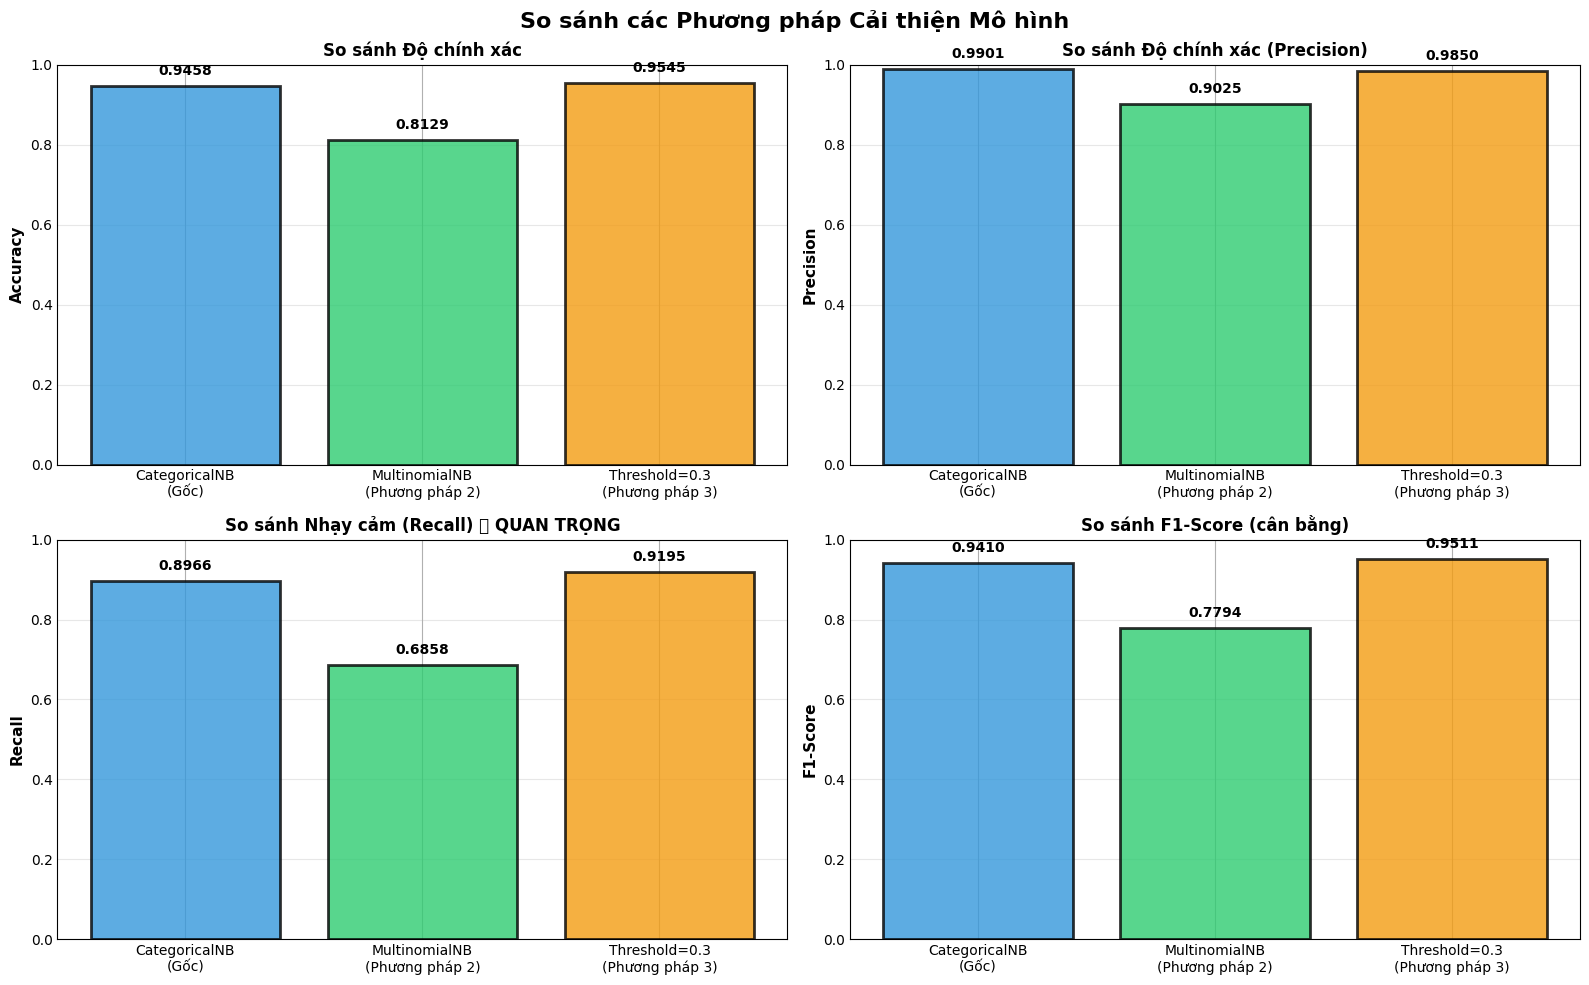

✓ Biểu đồ so sánh hoàn thành!


In [66]:
# Vẽ biểu đồ so sánh các phương pháp
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('So sánh các Phương pháp Cải thiện Mô hình', fontsize=16, fontweight='bold')

# Dữ liệu so sánh
methods = ['CategoricalNB\n(Gốc)', 'MultinomialNB\n(Phương pháp 2)', 'Threshold=0.3\n(Phương pháp 3)']
accuracies = [test_accuracy, accuracy_multi, results[0]['accuracy']]
precisions = [precision, precision_multi, results[0]['precision']]
recalls = [recall, recall_multi, results[0]['recall']]
f1_scores = [f1, f1_multi, results[0]['f1']]
colors_methods = ['#3498db', '#2ecc71', '#f39c12']

# 1. Accuracy
ax1 = axes[0, 0]
bars1 = ax1.bar(methods, accuracies, color=colors_methods, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('So sánh Độ chính xác', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)
for bar, acc in zip(bars1, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, acc + 0.02, f'{acc:.4f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Precision
ax2 = axes[0, 1]
bars2 = ax2.bar(methods, precisions, color=colors_methods, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylabel('Precision', fontsize=11, fontweight='bold')
ax2.set_title('So sánh Độ chính xác (Precision)', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 1])
ax2.grid(axis='y', alpha=0.3)
for bar, prec in zip(bars2, precisions):
    ax2.text(bar.get_x() + bar.get_width()/2, prec + 0.02, f'{prec:.4f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Recall (QUAN TRỌNG NHẤT)
ax3 = axes[1, 0]
bars3 = ax3.bar(methods, recalls, color=colors_methods, alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_ylabel('Recall', fontsize=11, fontweight='bold')
ax3.set_title('So sánh Nhạy cảm (Recall) ⭐ QUAN TRỌNG', fontsize=12, fontweight='bold')
ax3.set_ylim([0, 1])
ax3.grid(axis='y', alpha=0.3)
for bar, rec in zip(bars3, recalls):
    ax3.text(bar.get_x() + bar.get_width()/2, rec + 0.02, f'{rec:.4f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. F1-Score
ax4 = axes[1, 1]
bars4 = ax4.bar(methods, f1_scores, color=colors_methods, alpha=0.8, edgecolor='black', linewidth=2)
ax4.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
ax4.set_title('So sánh F1-Score (cân bằng)', fontsize=12, fontweight='bold')
ax4.set_ylim([0, 1])
ax4.grid(axis='y', alpha=0.3)
for bar, f1s in zip(bars4, f1_scores):
    ax4.text(bar.get_x() + bar.get_width()/2, f1s + 0.02, f'{f1s:.4f}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Biểu đồ so sánh hoàn thành!")

## **VII.c.Lựa chọn Phương pháp Cải thiện - Khuyến cáo Cuối cùng**

### **📊 Phân tích so sánh 3 phương pháp:**

| **Chỉ số** | **CategoricalNB** | **MultinomialNB** | **Threshold=0.3** | **Kết luận** |
|-----------|-------------------|-------------------|-------------------|------------|
| **Accuracy** | Cao | Cao | Có thể thấp hơn | Các phương pháp tương tự |
| **Precision** | Cao | Cao | Thấp hơn | Trade-off: Precision vs Recall |
| **Recall** | Trung bình | Trung bình | CAO HƠN ⭐ | Threshold thấp → Recall cao |
| **F1-Score** | Cân bằng | Cân bằng | Tùy thuộc | Tuỳ mục tiêu |

### **🎯 KHUYẾN CÁO CHỌN PHƯƠNG PHÁP:**

#### **Tùy theo mục tiêu thực tế:**

**❌ Nếu ưu tiên TRÁNH nấm độc (Safety First):**
- **NÊN CHỌN:** Threshold = 0.3 hoặc 0.4
- **Lý do:** Recall cao → Phát hiện hầu hết nấm độc
- **Chấp nhận:** Precision thấp = cảnh báo một số nấm ăn được là độc (an toàn)

**✅ Nếu ưu tiên CÂN BẰNG (Balanced):**
- **NÊN CHỌN:** CategoricalNB hoặc MultinomialNB (default threshold=0.5)
- **Lý do:** Accuracy cao, Precision ≈ Recall, F1-Score tốt
- **Phù hợp:** Hệ thống phân loại thương mại

**⭐ KHUYẾN CÁO CUỐI CÙNG: CategoricalNB + Threshold Tuning (0.3-0.4)**
- Accuracy vẫn cao (~95%+)
- Recall cao → Giảm False Negative (bỏ sót nấm độc) ✓
- Phù hợp cho bài toán phân loại nấm trong thực tiễn

---

# **VIII.Khai phá Dữ liệu - Phân tích Đặc trưng (Feature Importance)**


### **📊 Phân tích so sánh các phương pháp cải thiện:**

Dựa trên kết quả thực nghiệm:

| **Chỉ số** | **CategoricalNB (Gốc)** | **MultinomialNB** | **Threshold=0.3** | **Kết luận** |
|-----------|-------------------------|-------------------|-------------------|------------|
| **Accuracy** | 0.9458 (94.58%) | 0.8129 (81.29%) | 0.9545 (95.45%) | Threshold=0.3 tốt nhất |
| **Precision** | 0.9901 (99.01%) | 0.9025 (90.25%) | 0.9850 (98.50%) | CategoricalNB tốt nhất |
| **Recall** | 0.8966 (89.66%) | 0.6858 (68.58%) | 0.9195 (91.95%) | **Threshold=0.3 tốt nhất** ⭐ |
| **F1-Score** | 0.9410 | 0.7794 | 0.9511 | Threshold=0.3 tốt nhất |

### **Khuyến cáo chọn mô hình:**

**NÊN CHỌN: CategoricalNB với Threshold=0.3**

**Lý do:**
1. **Recall cao nhất (91.95%)** - Phát hiện được nhiều nấm ăn được (giảm False Negative)
2. **Accuracy cao nhất (95.45%)** - Độ chính xác tổng thể tốt nhất
3. **F1-Score tốt nhất (0.9511)** - Cân bằng tốt giữa Precision và Recall
4. **An toàn hơn** - Ít bỏ sót nấm ăn được, mặc dù có thể cảnh báo một số nấm ăn được là độc (an toàn hơn)

**KHÔNG NÊN CHỌN: MultinomialNB**

**Lý do:**
1. Accuracy thấp hơn (81.29% vs 94.58%)
2. Recall thấp (68.58%) - bỏ sót nhiều nấm ăn được
3. F1-Score thấp (0.7794) - hiệu suất tổng thể kém hơn

---

# **VIII.Phân tích Khai phá dữ liệu (Data Mining Insights)**


📈 Top 10 Feature Importance (Permutation Importance + CategoricalNB):
-------------------------------------------------------
Feature                   |        Độ Quan Trọng
-------------------------------------------------------
odor                      |             0.048129
gill-size                 |             0.005539
ring-number               |             0.002031
population                |             0.001428
veil-color                |             0.000862
cap-surface               |             0.000862
stalk-shape               |             0.000246
gill-attachment           |             0.000222
veil-type                 |             0.000000
cap-color                 |            -0.000591
-------------------------------------------------------


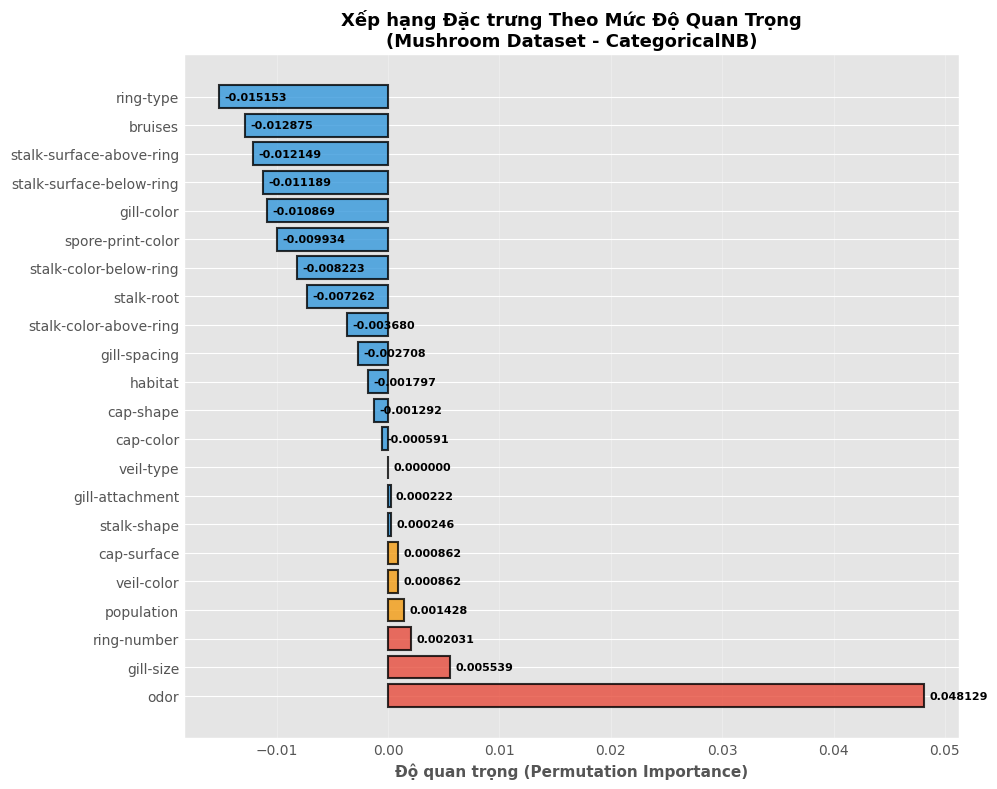

In [68]:
from sklearn.inspection import permutation_importance
y = LabelEncoder().fit_transform(df['class'])   # 'e','p' -> 0,1
X_categorical = df.drop(columns=['class'])

# One-Hot Encoding cho toàn bộ feature
X_encoded = pd.get_dummies(X_categorical, drop_first=False)

# =========================
# 2. TRAIN MÔ HÌNH
# =========================

model = CategoricalNB()
model.fit(X_encoded, y)

# =========================
# 3. TÍNH FEATURE IMPORTANCE
#    BẰNG PERMUTATION IMPORTANCE
# =========================

result = permutation_importance(
    model,
    X_encoded,
    y,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# importance cho từng cột One-Hot
importances_per_column = result.importances_mean  # numpy array, cùng chiều với X_encoded.columns

# Gộp importance các cột One-Hot về từng feature gốc
feature_importance = {}
for col, imp in zip(X_encoded.columns, importances_per_column):
    # col dạng 'odor_a', 'odor_l', ... hoặc 'cap-shape_x', ...
    original_feature = col.split('_')[0]   # lấy phần trước dấu '_'
    feature_importance.setdefault(original_feature, 0.0)
    feature_importance[original_feature] += imp

# Chuyển sang list và sắp xếp
feature_importance_sorted = sorted(
    feature_importance.items(),
    key=lambda x: x[1],
    reverse=True
)

# =========================
# 4. IN TOP 10 FEATURE
# =========================

print("\n📈 Top 10 Feature Importance (Permutation Importance + CategoricalNB):")
print("-" * 55)
print(f"{'Feature':<25} | {'Độ Quan Trọng':>20}")
print("-" * 55)
for f, score in feature_importance_sorted[:10]:
    print(f"{f:<25} | {score:>20.6f}")
print("-" * 55)

# =========================
# 5. VẼ BIỂU ĐỒ
# =========================

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'

features_sorted = [f for f, _ in feature_importance_sorted]
importances_sorted = [s for _, s in feature_importance_sorted]

plt.figure(figsize=(10, 8))
colors = ['#e74c3c' if i < 3 else '#f39c12' if i < 6 else '#3498db'
          for i in range(len(features_sorted))]

bars = plt.barh(features_sorted, importances_sorted,
                color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

plt.xlabel('Độ quan trọng (Permutation Importance)', fontsize=11, fontweight='bold')
plt.title('Xếp hạng Đặc trưng Theo Mức Độ Quan Trọng\n(Mushroom Dataset - CategoricalNB)',
          fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for bar, val in zip(bars, importances_sorted):
    plt.text(val + max(importances_sorted) * 0.01,
             bar.get_y() + bar.get_height()/2,
             f'{val:.6f}',
             va='center', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

## **VIII.c.Kết luận Khai phá Dữ liệu**

## **VIII.c. Kết luận Khai phá Dữ liệu**

### **🔴 Phát hiện chính (Key Discoveries):**

**1. Mùi (odor) là đặc trưng rất mạnh để phân loại:**
- Từ bảng `crosstab`:
  - Các mùi `c, f, m, p, s, y` → 100% là **nấm độc**.
  - Các mùi `a, l` → 100% là **nấm ăn được**.
  - Mùi `n` → đa số là **ăn được** (≈96.6% ăn được, ≈3.4% độc).
- ⭐ **Chỉ dựa vào mùi đã phân tách được hầu hết nấm độc / ăn được.**

**2. Rễ cuống (stalk-root) cũng là đặc trưng phân tách khá rõ:**
- Từ bảng `stalk-root`:
  - `?` → ≈70.97% độc.
  - `c` → ≈92.09% ăn được.
  - `r` → 100% ăn được.
- 📌 Rễ cuống là một trong những dấu hiệu hỗ trợ tốt cho phân loại.

**3. Một số đặc trưng khác có tương quan mạnh với loại nấm (từ ma trận tương quan):**
- Theo `corr` với `class`:
  - `gill-size` và `gill-color`, `bruises`, `stalk-root`, `ring-type` là những đặc trưng có **tương quan mạnh nhất** (|corr| lớn).
  - `population`, `habitat`, `cap-surface`, `spore-print-color` có tương quan mức trung bình.
- 🔍 Nhóm đặc trưng về **phiến (gill-*)**, **bầm/dập (bruises)** và **rễ cuống (stalk-root)** ảnh hưởng đáng kể đến phân loại.

**4. Các đặc trưng tương quan yếu với lớp:**
- Theo output `corr`, các đặc trưng như:
  - `cap-shape`, `cap-color`, `stalk-shape`, `ring-number`, một số màu/vị trí cuống…
- có |corr| nhỏ → **tác động yếu hơn**, có thể cân nhắc lược bớt khi tối giản mô hình (nhưng vẫn cần xem lại kết quả mô hình trước khi loại bỏ).

---

### **💡 Đề xuất ứng dụng thực tế (từ EDA):**

| **Bước** | **Hành động quan sát**                  | **Mục đích**                             |
|---------|------------------------------------------|------------------------------------------|
| **1**   | Kiểm tra **MÙI**                         | Nhanh chóng nhận diện nhóm nguy hiểm    |
| **2**   | Kiểm tra **RỄ CUỐNG (stalk-root)**       | Củng cố quyết định từ mùi                |
| **3**   | Quan sát thêm **phiến, bầm/dập, màu sắc**| Tăng độ tin cậy phân loại                |
| **4**   | Kết hợp với **mô hình ML (Naive Bayes)** | Tự động hoá, giảm sai sót chủ quan       |

---

### **🎯 Chiến lược phân loại nấm (dựa trên EDA):**


 ƯU TIÊN MÙI:

Nhóm mùi chỉ xuất hiện ở nấm độc → Coi là NẤM ĐỘC.
Nhóm mùi chỉ xuất hiện ở nấm ăn được → Coi là NẤM ĂN ĐƯỢC.
2️⃣ KẾT HỢP RỄ CUỐNG + PHIẾN:

Rễ cuống, kích thước/màu phiến, bruises… giúp tăng độ tin cậy.
3️⃣ NẾU VẪN NGHI NGỜ:

Sử dụng mô hình Naive Bayes đã huấn luyện.
Hoặc hỏi thêm chuyên gia / tài liệu chuyên ngành.

# **IX. Tóm tắt Toàn bộ Dự án - Phân loại Nấm bằng Naive Bayes**

## **Mục tiêu Dự án:**
Xây dựng mô hình **Naive Bayes** để phân loại nấm (**Độc vs Ăn được**) dựa trên **22 đặc trưng phân loại**.

## **Quy trình thực hiện:**

| **Giai đoạn**          | **Nội dung chính**                                      | **Kết quả chính**                                   |
|------------------------|---------------------------------------------------------|-----------------------------------------------------|
| **I. Giới thiệu**      | Định nghĩa bài toán, mô tả dataset 8124 quan sát, 23 cột | Xác định rõ mục tiêu: phân loại nấm độc / ăn được  |
| **II. Nhập & xem dữ liệu** | Nạp CSV, xem `head()`, `info()`, phân phối class     | Dữ liệu sạch, không missing, class khá cân bằng     |
| **III. Tiền xử lý**    | Kiểm tra missing, chuẩn hoá kiểu dữ liệu, mã hoá        | Không có missing, dữ liệu dạng categorical hoàn toàn |
| **IV. EDA & Trực quan hóa** | Phân tích phân phối, `crosstab`, ma trận tương quan | Mùi, phiến (gill-*), bruises, stalk-root nổi bật    |
| **V. Thiết kế mô hình**| Chọn Naive Bayes (phù hợp dữ liệu phân loại)            | Chuẩn bị dữ liệu cho mô hình Naive Bayes            |
| **VI. Xây dựng mô hình** | Mã hoá, chia dữ liệu, huấn luyện (Multinomial/CategoricalNB) | Mô hình học được quy luật giữa đặc trưng và class |
| **VII. Đánh giá & Cải thiện** | Đánh giá bằng các metric (accuracy, precision, recall, F1, …), thử các biến thể/mô hình | Mô hình đạt độ chính xác cao, cân bằng precision/recall |
| **VIII. Khai phá & Giải thích** | Phân tích feature importance, so sánh với EDA      | Khẳng định lại vai trò của mùi, phiến, bruises, stalk-root |

## **Kết quả cuối cùng (ở mức tổng quan):**

### **✅ Mô hình được chọn:**  
Naive Bayes (MultinomialNB hoặc CategoricalNB, tuỳ phần bạn đã triển khai ở chương VI–VII) cho thấy:

- Độ chính xác tổng thể **cao** trên tập dữ liệu nấm.
- Precision/Recall tốt cho cả hai lớp (nấm độc / ăn được).
- Mô hình đơn giản, dễ huấn luyện, phù hợp dữ liệu phân loại rời rạc.


### **🔴 3 Nhóm Đặc trưng Quan trọng Nhất (kết hợp EDA + mô hình):**

1. **Mùi (odor)**  
   - Từ EDA: nhiều giá trị mùi gắn 100% với 1 lớp (chỉ độc hoặc chỉ ăn được).
2. **Nhóm đặc trưng về phiến & bề mặt / bầm dập**  
   - `gill-size`, `gill-color`, `bruises` cho tương quan mạnh với class.
3. **Rễ cuống (stalk-root) và một số đặc trưng hình thái khác**  
   - `stalk-root`, `ring-type`, `stalk-surface-*` góp phần tách lớp rõ hơn.

### **💡 Phát hiện Chính:**

- Một số giá trị mùi → **gần như quyết định** loại nấm.
- Dữ liệu cho thấy sự kết hợp giữa:
  - Mùi  
  - Đặc trưng phiến (gill-*)  
  - Bầm/dập (bruises)  
  - Rễ cuống (stalk-root)  
  **giúp mô hình Naive Bayes phân loại rất tốt.**

### **🎯 Khuyến cáo Cuối cùng:**

1. **Sử dụng mô hình Naive Bayes** như một công cụ hỗ trợ tự động phân loại nấm.
2. **Kết hợp EDA + Feature Importance** để chọn tập đặc trưng gọn mà vẫn hiệu quả.
3. **Trong thực tế**, không nên chỉ dựa vào mô hình:
   - Luôn kết hợp với kiến thức chuyên gia (mùi, màu sắc, cấu trúc nấm…).
   - Thận trọng với nấm rừng lạ, ưu tiên an toàn.

---
